
BASIC STATISTICS:

Mean:
 Roll-1                                                  169.33
Math-1 Theory                                            60.45
Physics Theory                                           62.20
Physics Practical                                        72.35
Java-1 Theory                                            49.22
Java-1 Practical                                         75.48
Software Engineering Theory                              63.98
Software Engineering Practical                           72.23
Environmental Science Theory                             71.37
IOT Workshop Practical                                   75.99
Computer Workshop Practical                              78.49
Math-2 Theory                                            53.30
Data Structures using Java Theory                        60.05
Data Structures using Java Practical                     71.11
DBMS Theory                                              60.92
DBMS Practical              

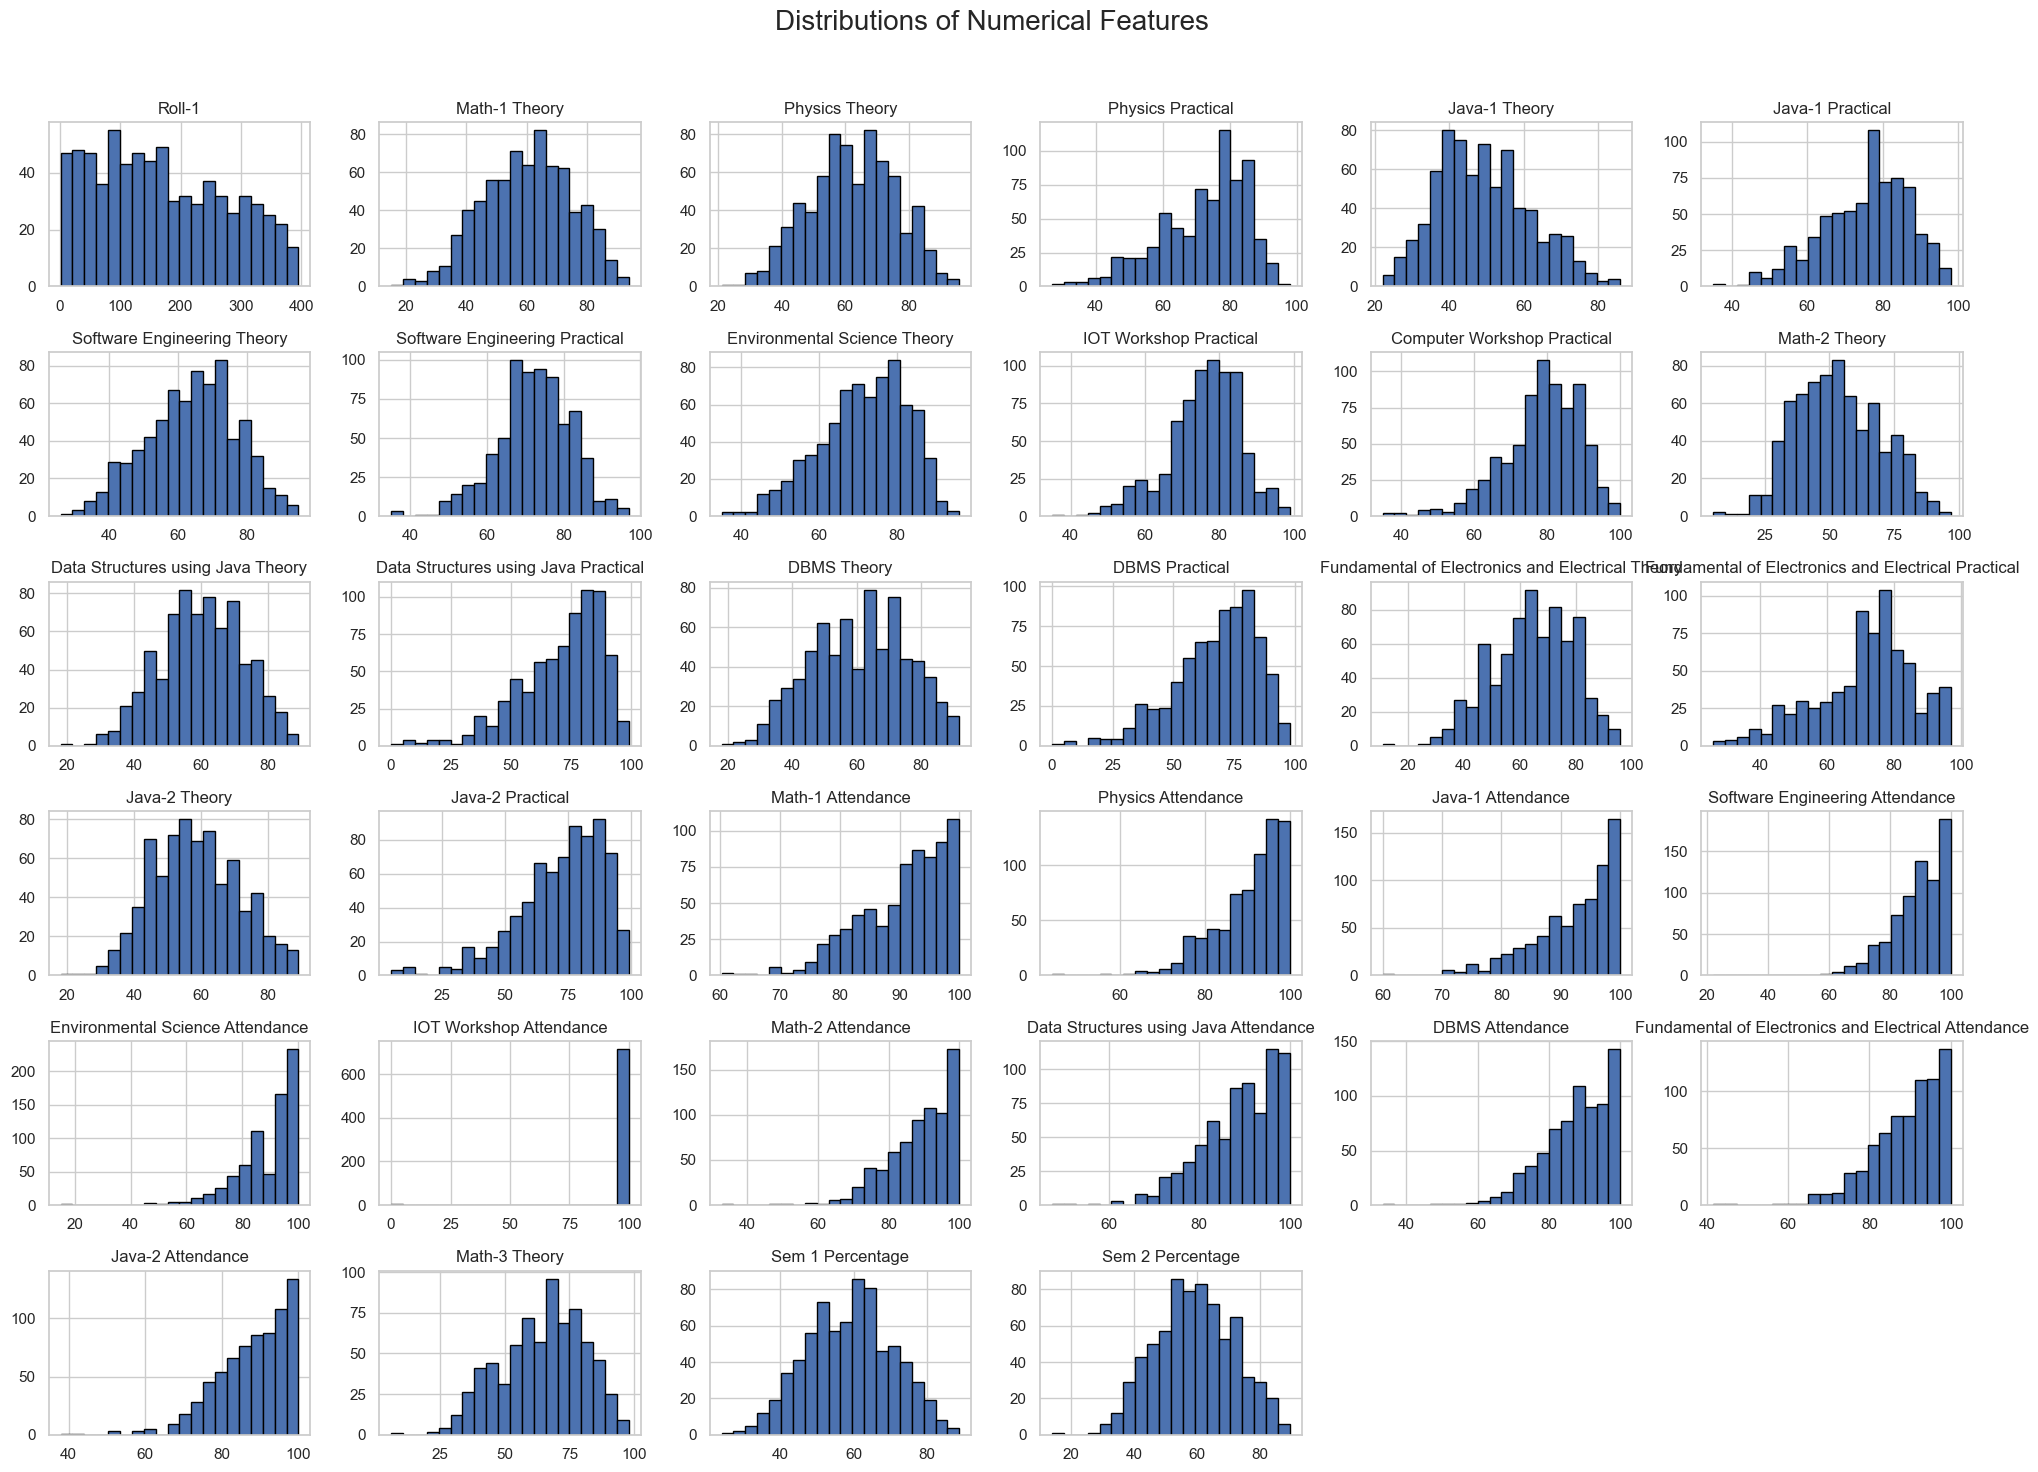

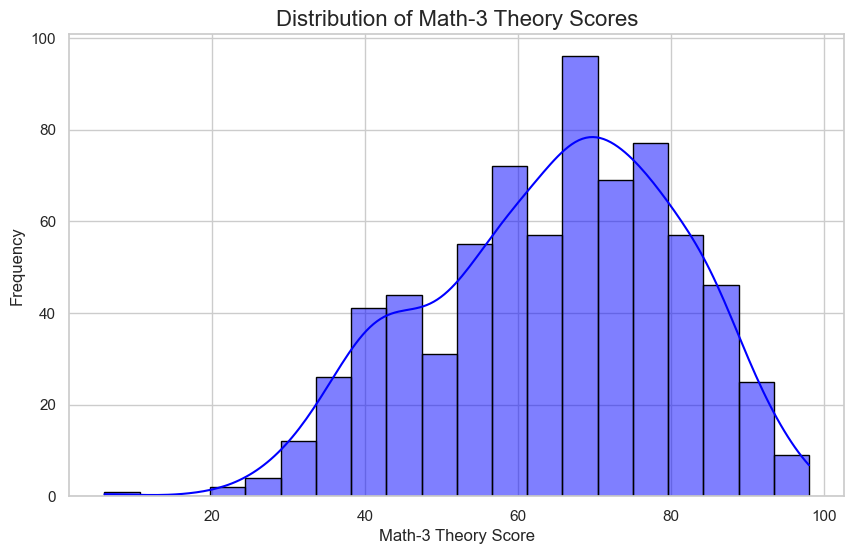

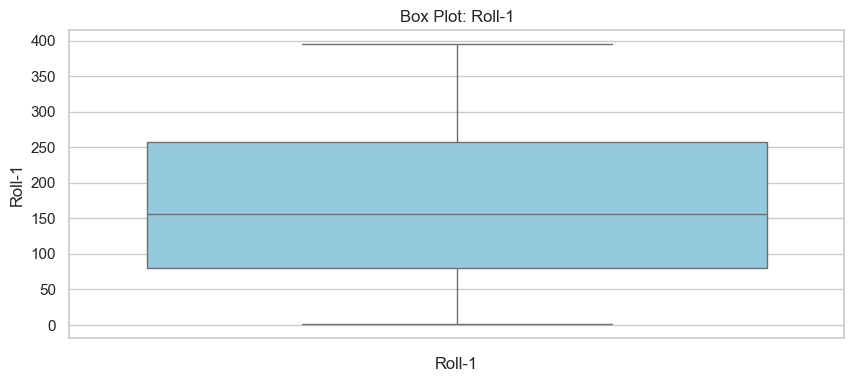

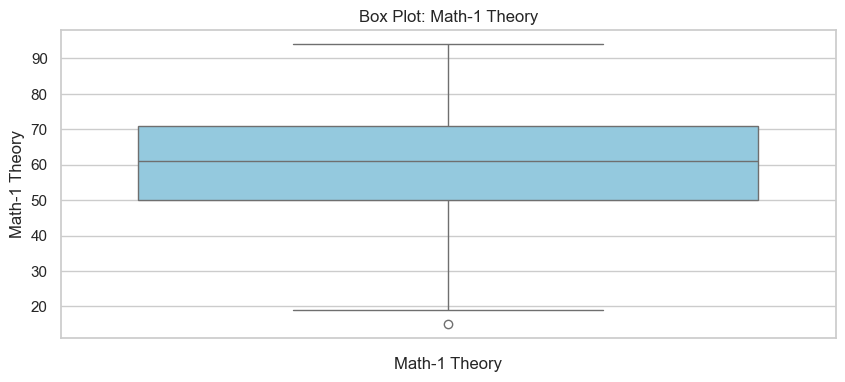

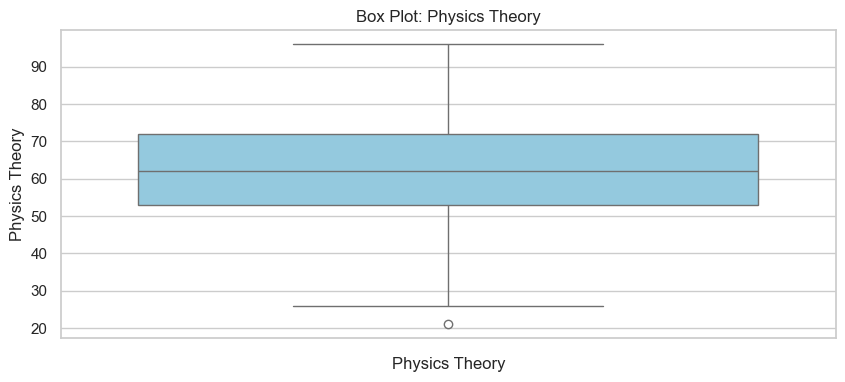

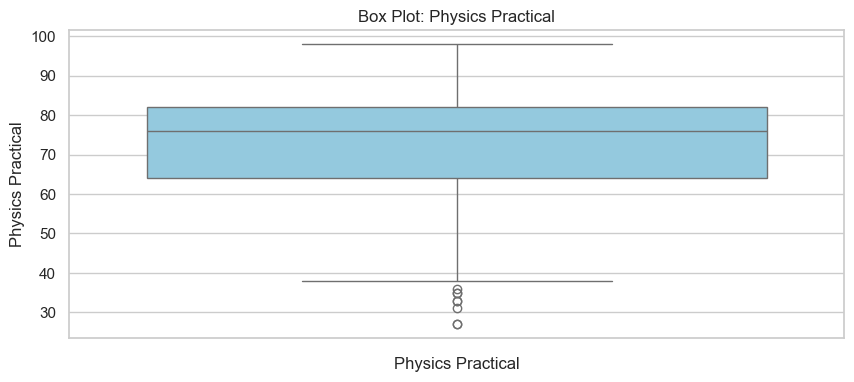

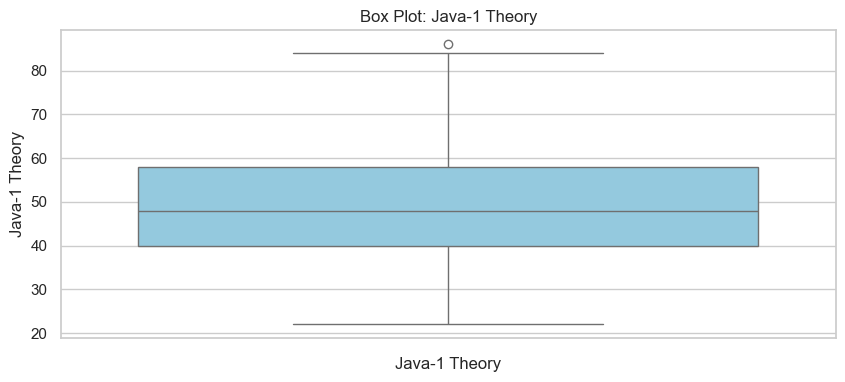

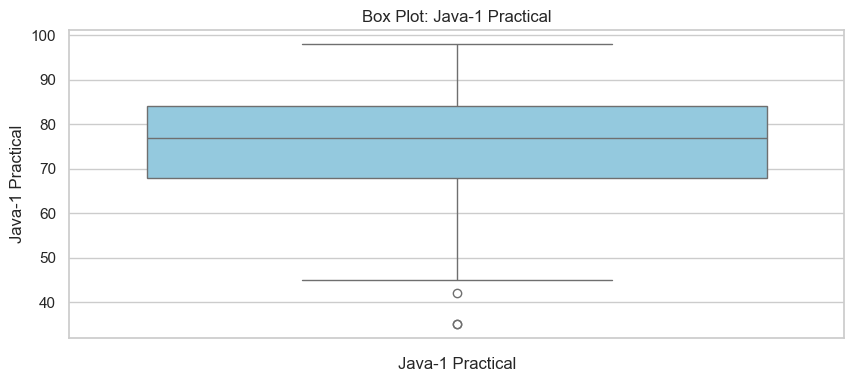

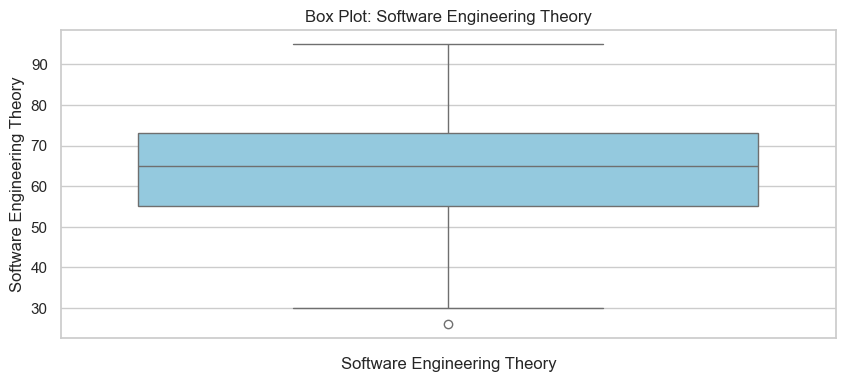

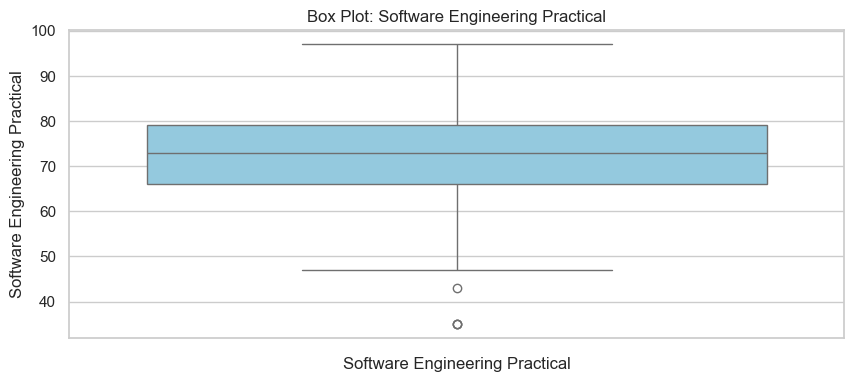

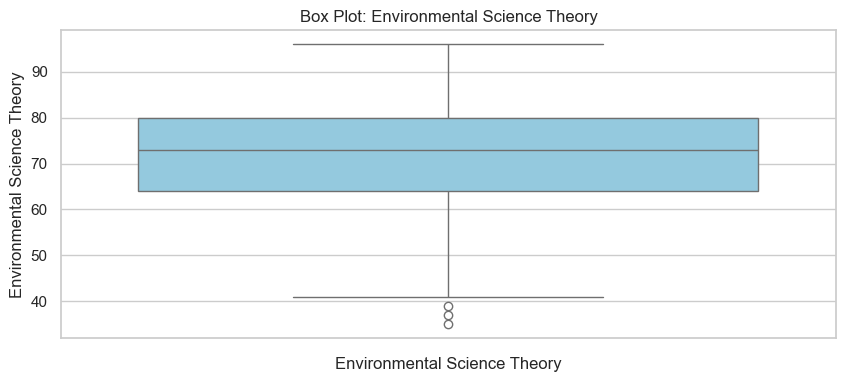

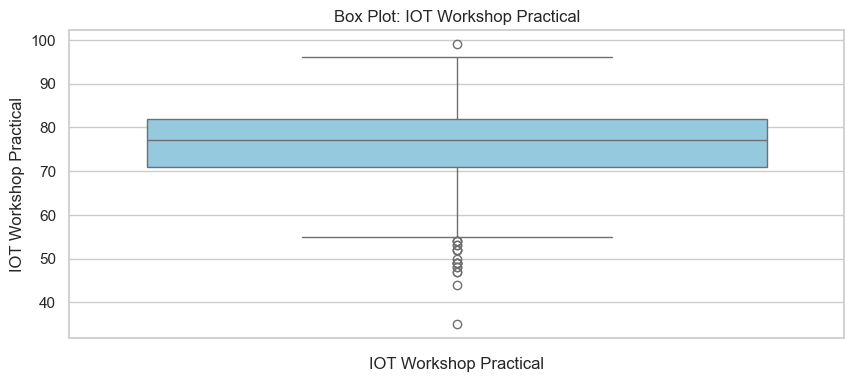

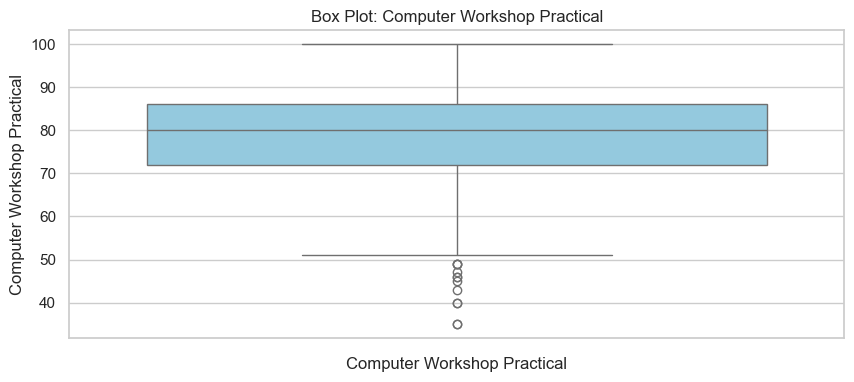

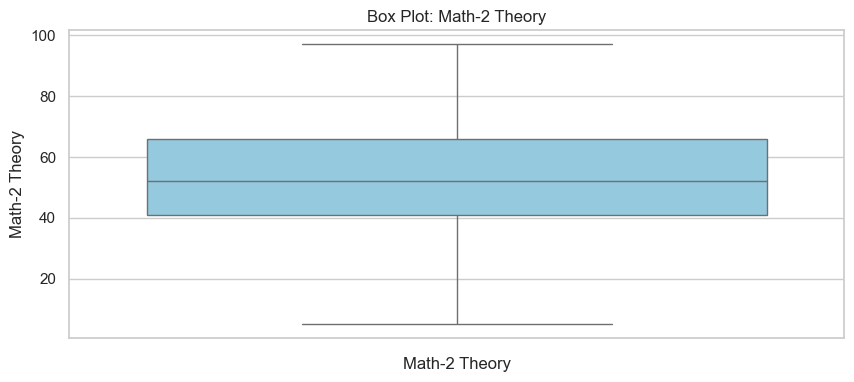

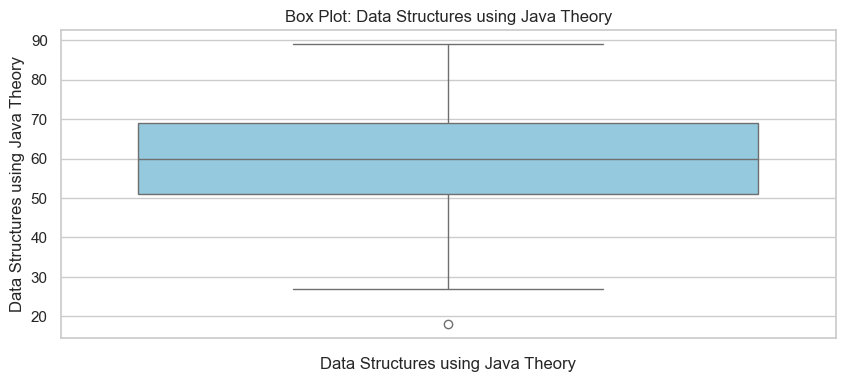

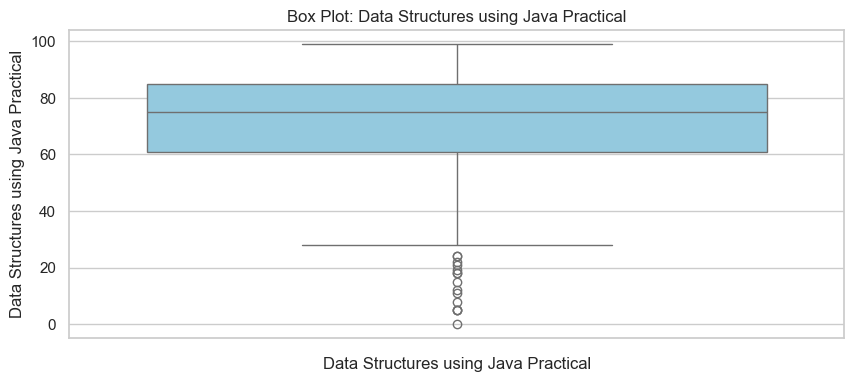

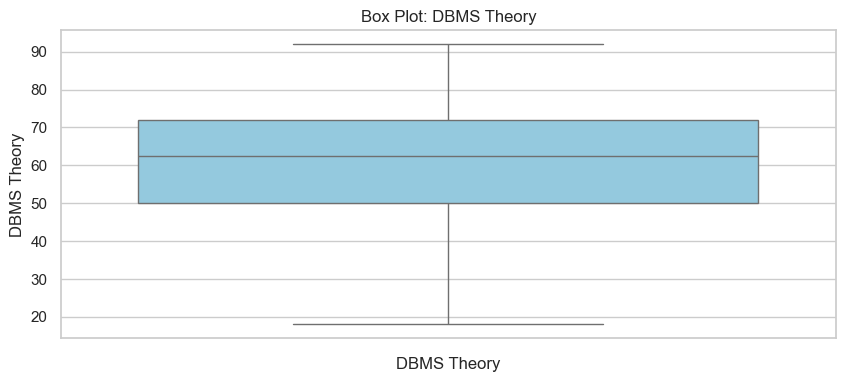

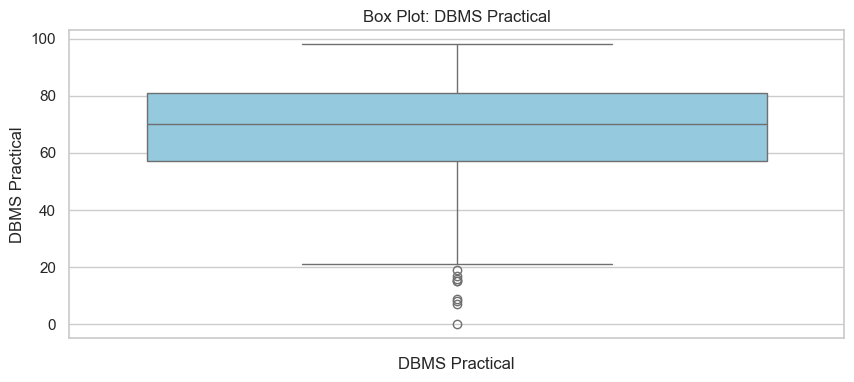

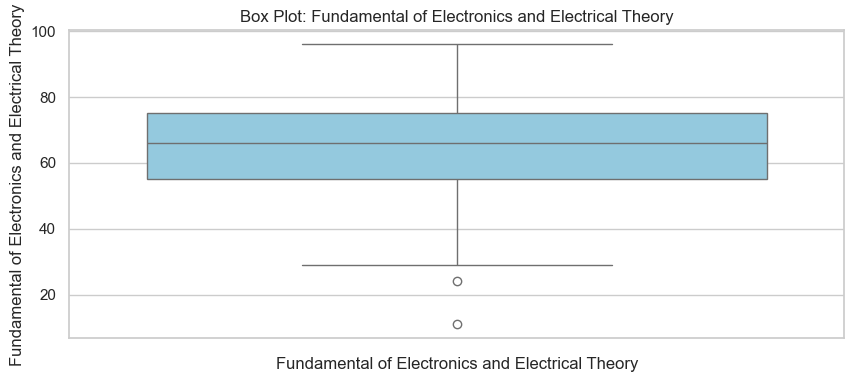

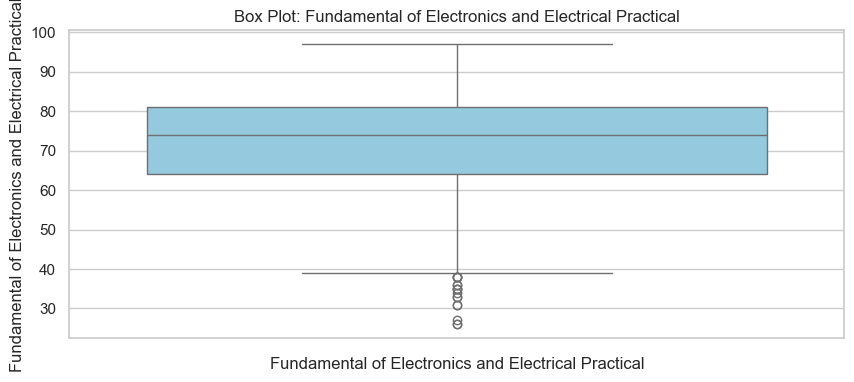

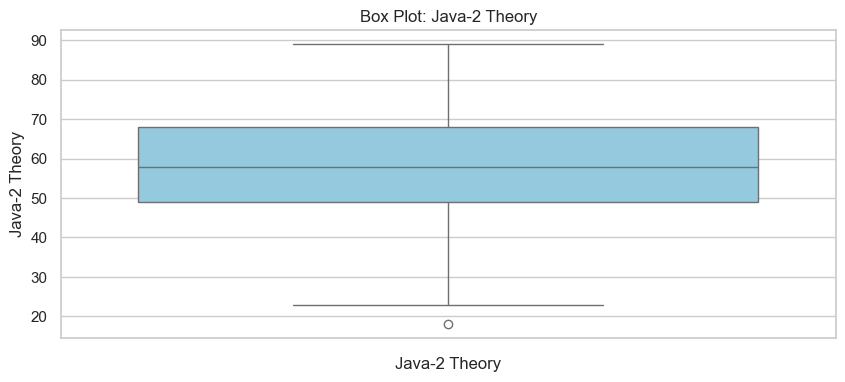

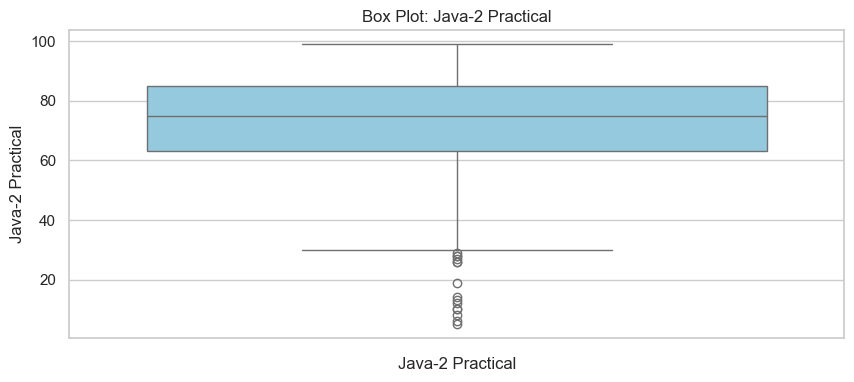

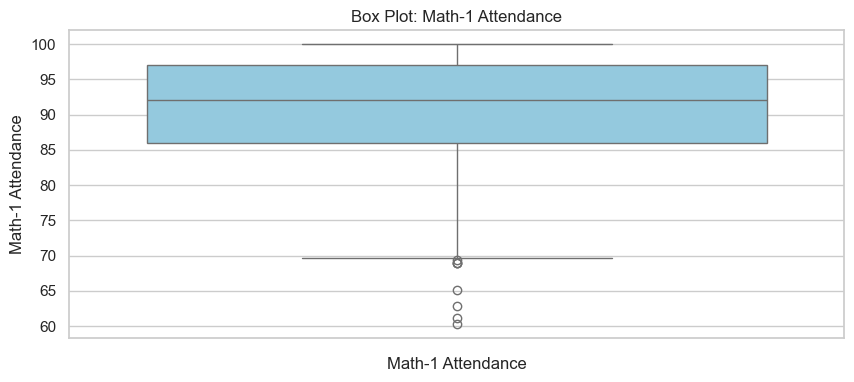

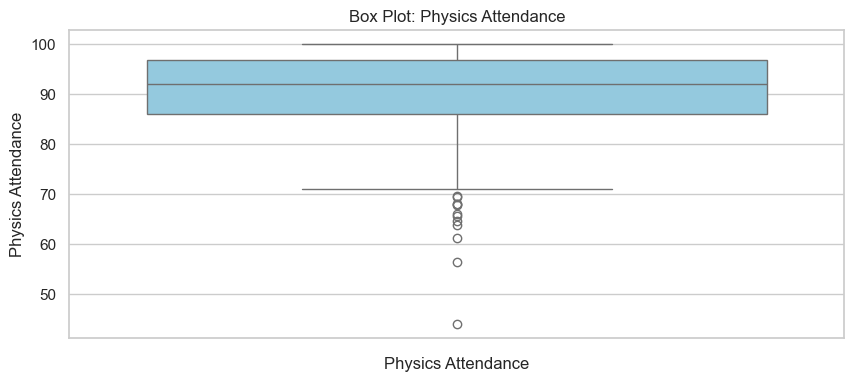

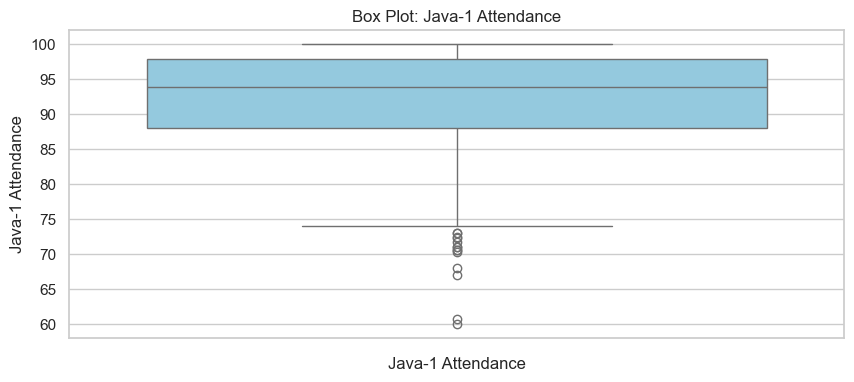

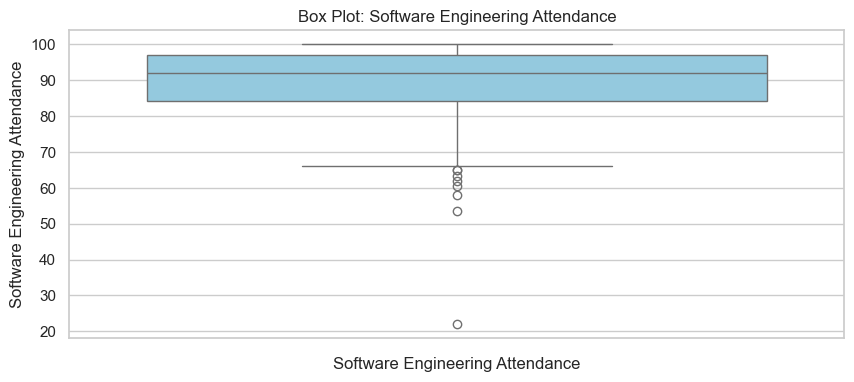

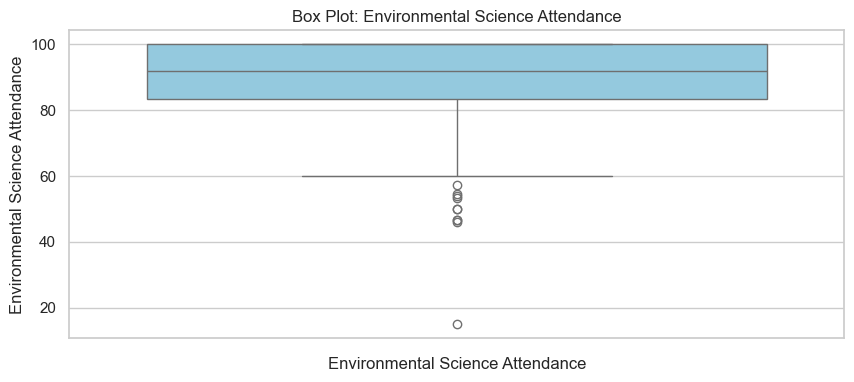

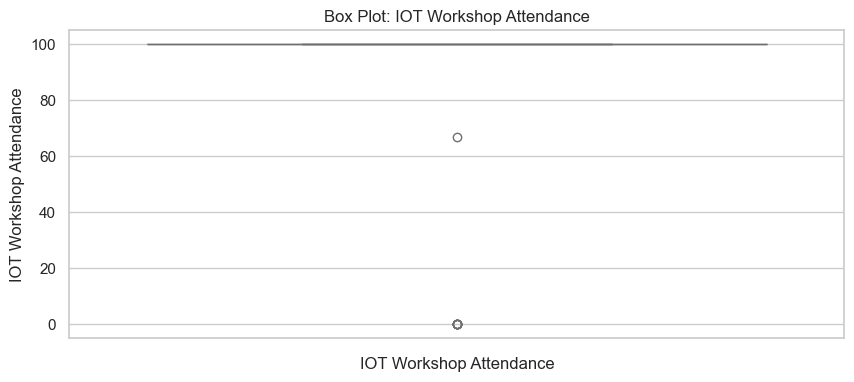

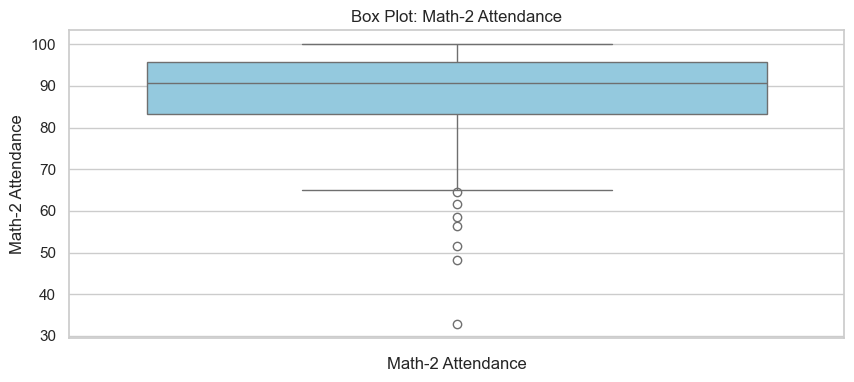

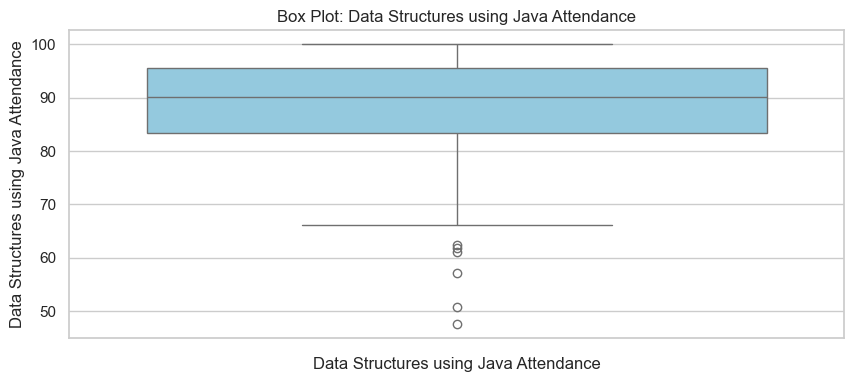

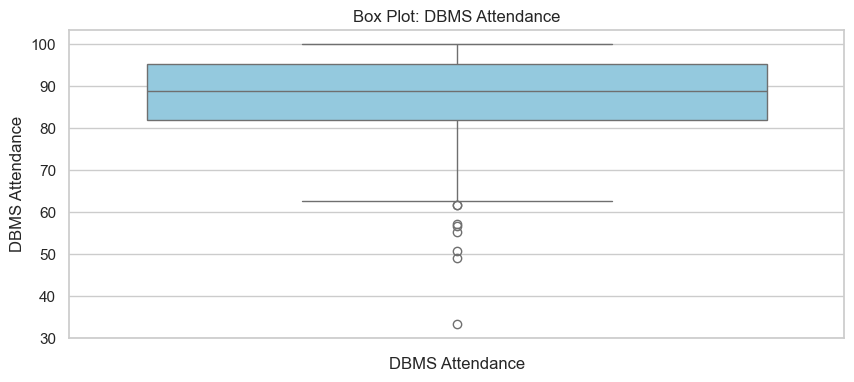

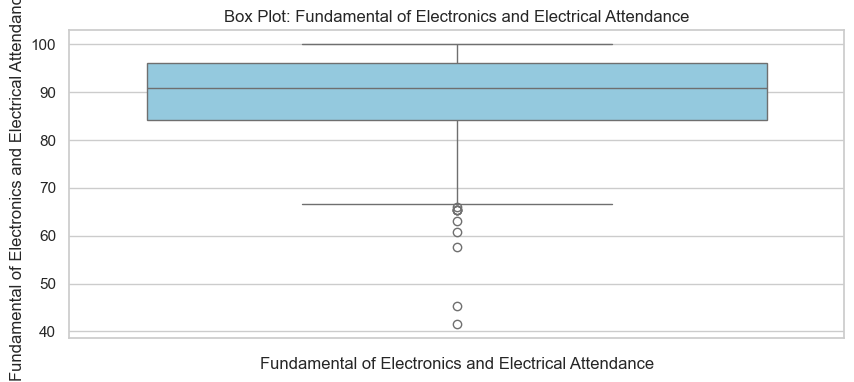

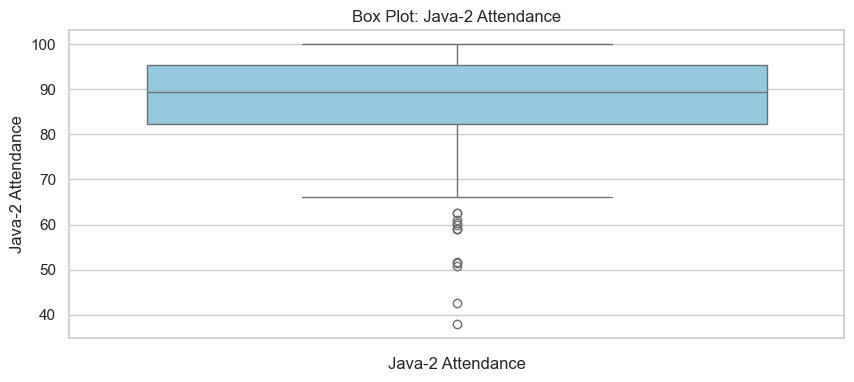

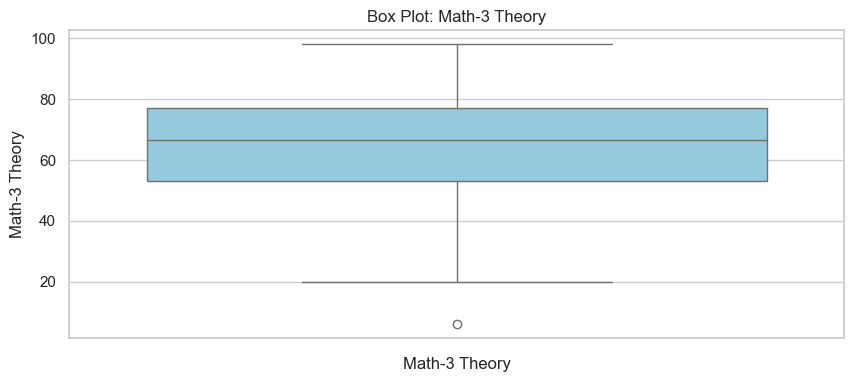

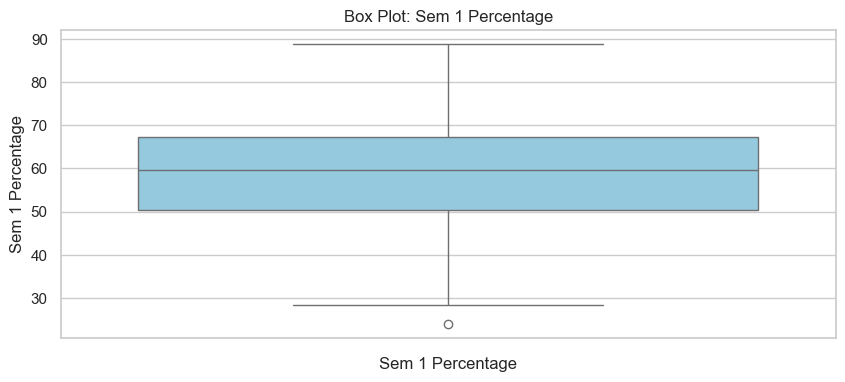

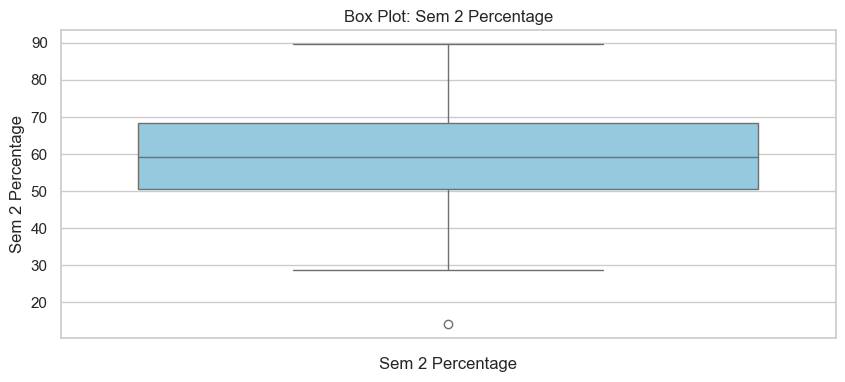

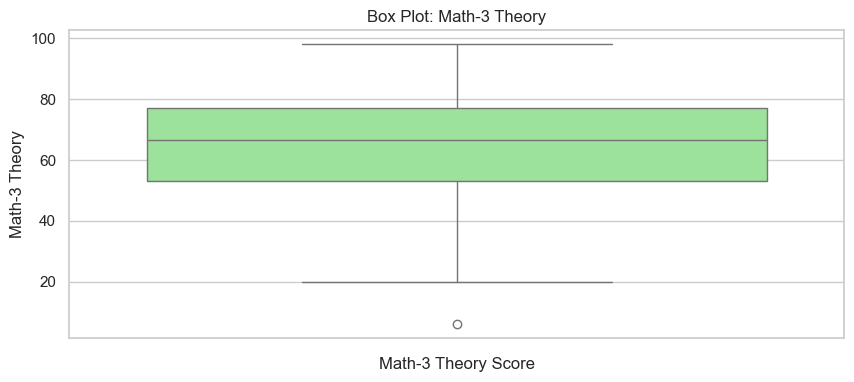

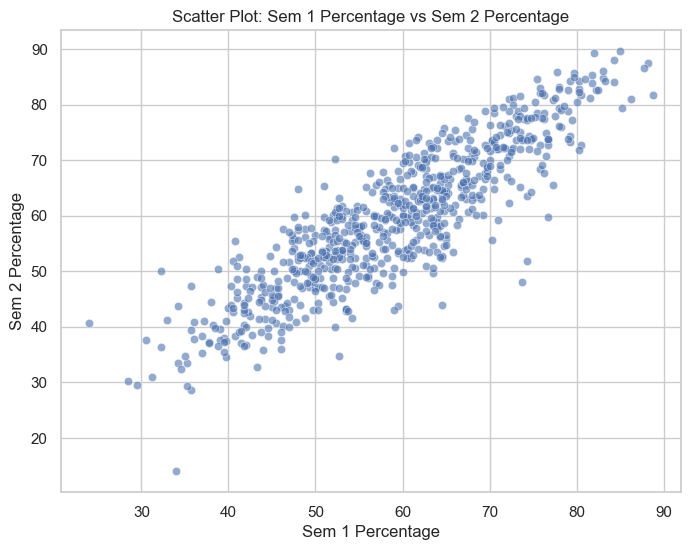

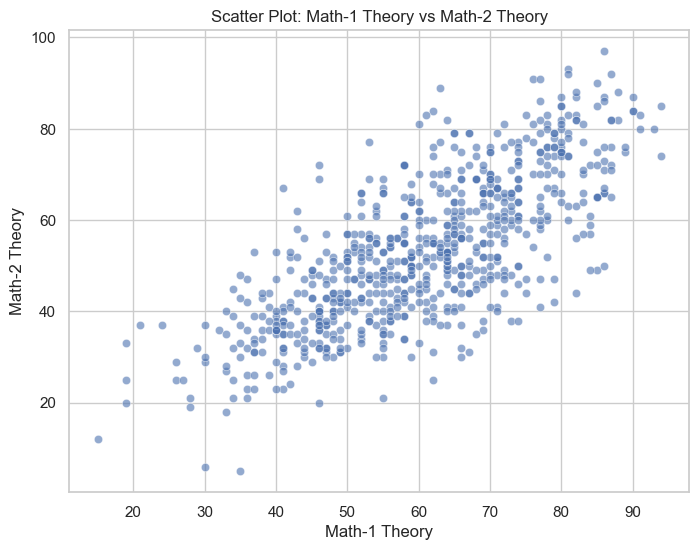

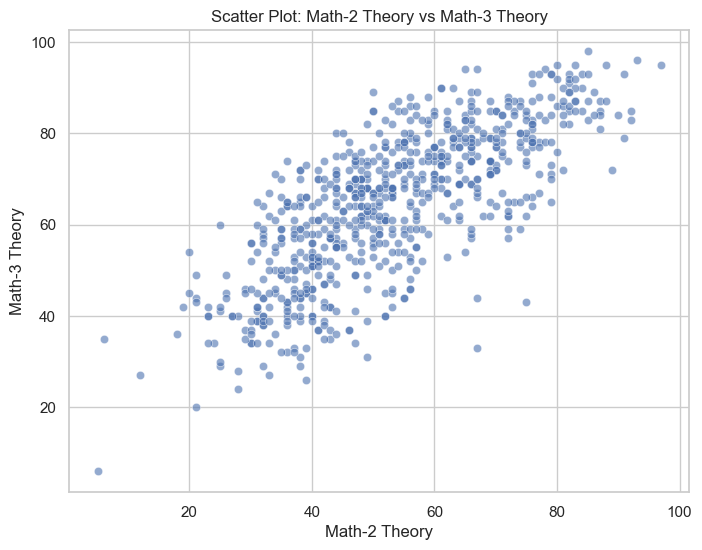

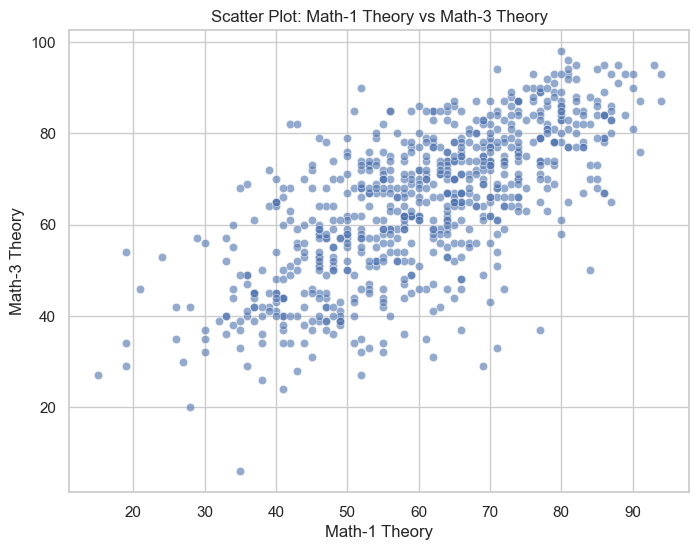

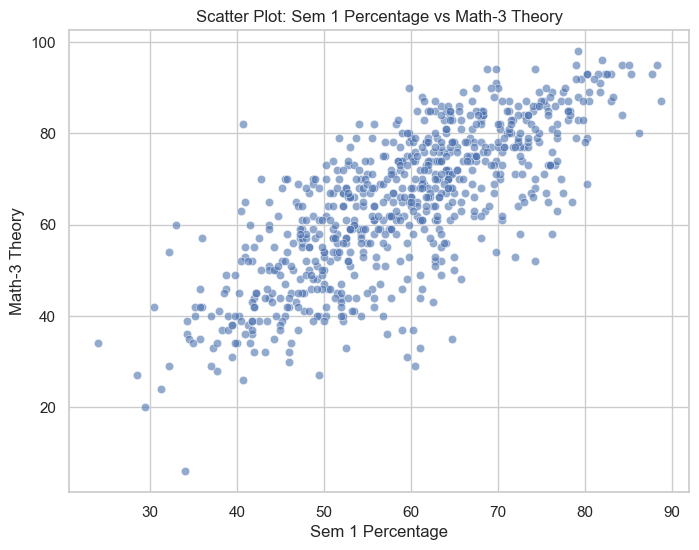

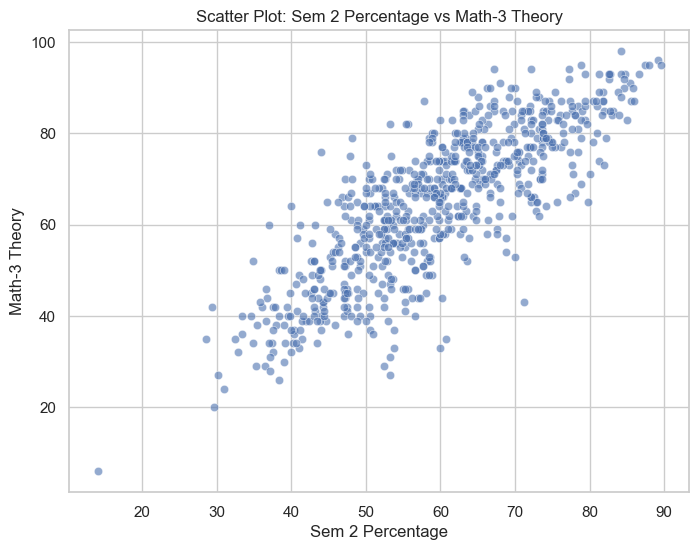


Correlation Matrix (Math-3 Theory Focus):
                   Math-3 Theory  Math-1 Theory  Math-2 Theory  \
Math-3 Theory              1.00           0.70           0.75   
Math-1 Theory              0.70           1.00           0.74   
Math-2 Theory              0.75           0.74           1.00   
Sem 1 Percentage           0.77           0.87           0.77   
Sem 2 Percentage           0.82           0.76           0.88   

                  Sem 1 Percentage  Sem 2 Percentage  
Math-3 Theory                 0.77              0.82  
Math-1 Theory                 0.87              0.76  
Math-2 Theory                 0.77              0.88  
Sem 1 Percentage              1.00              0.88  
Sem 2 Percentage              0.88              1.00  


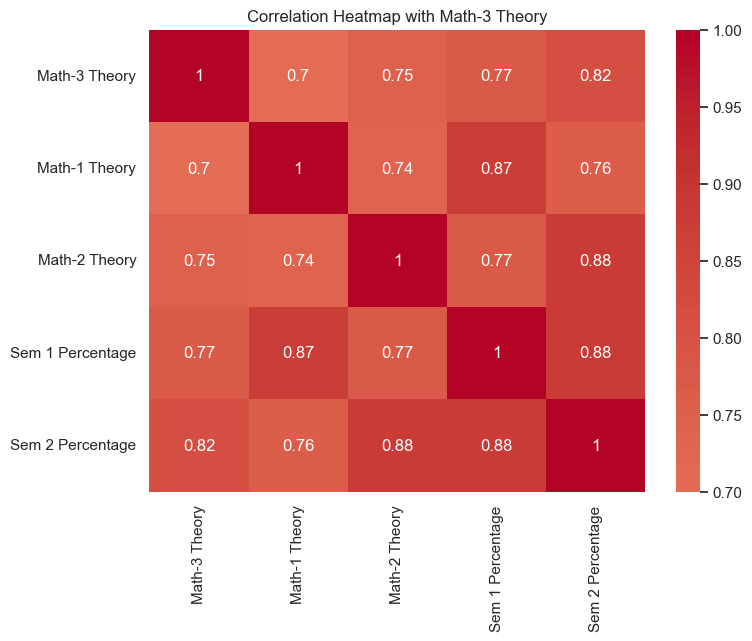

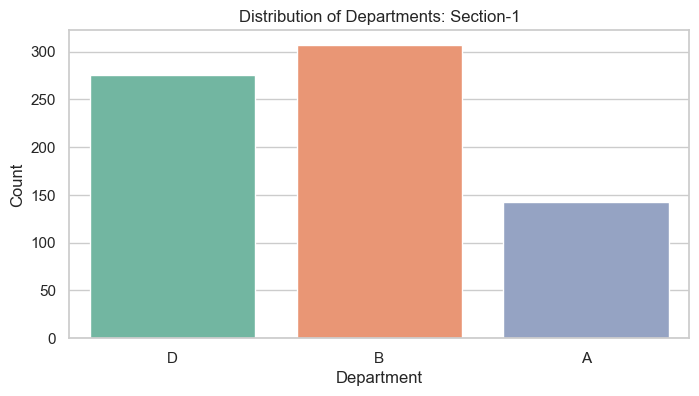

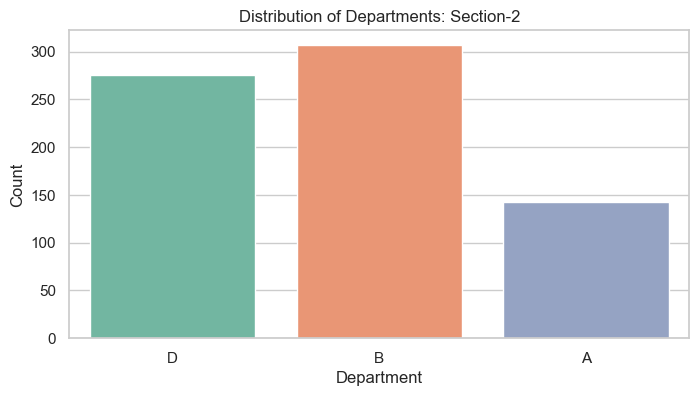

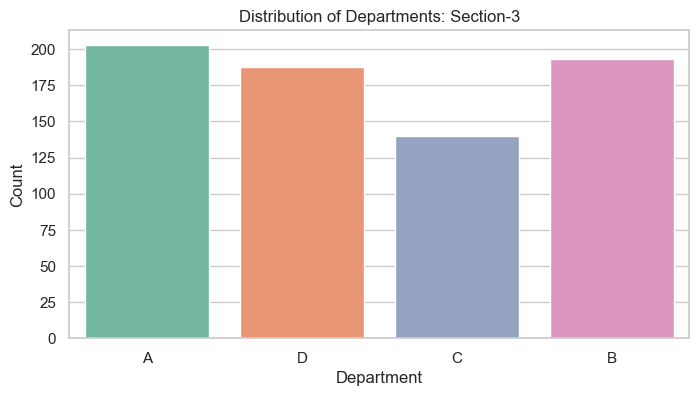

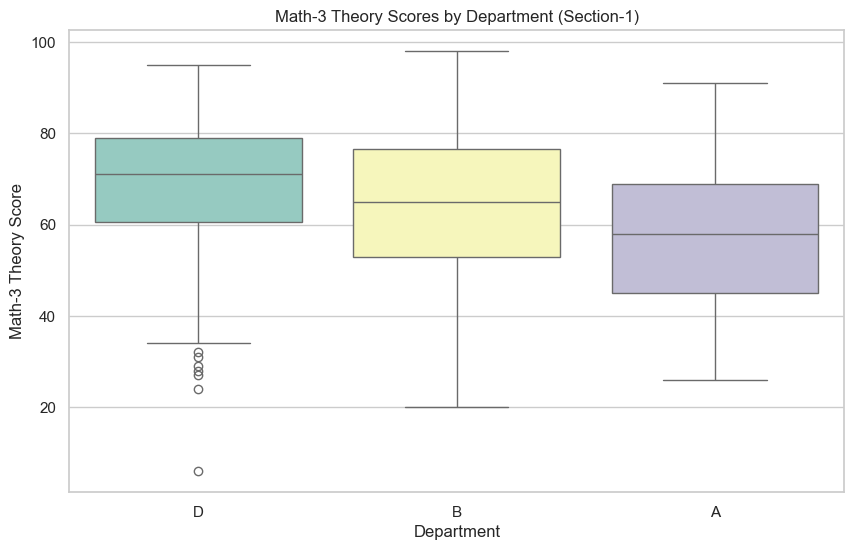

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# BASIC STATISTICS
print("\nBASIC STATISTICS:\n")
print("Mean:\n", df.mean(numeric_only=True).round(2))
print("\nMedian:\n", df.median(numeric_only=True).round(2))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0].round(2))
print("\nMinimum:\n", df.min(numeric_only=True))
print("\nMaximum:\n", df.max(numeric_only=True))

# MATH-3 THEORY FOCUSED EDA
print("\nMATH-3 THEORY SPECIFIC STATISTICS:\n")
print("Mean Math-3 Theory:", df["Math-3 Theory"].mean().round(2))
print("Median Math-3 Theory:", df["Math-3 Theory"].median().round(2))
print("Mode Math-3 Theory:", df["Math-3 Theory"].mode()[0].round(2))
print("Min Math-3 Theory:", df["Math-3 Theory"].min())
print("Max Math-3 Theory:", df["Math-3 Theory"].max())
print("Std Dev Math-3 Theory:", df["Math-3 Theory"].std().round(2))
print("Skewness Math-3 Theory:", df["Math-3 Theory"].skew().round(2))
print("Kurtosis Math-3 Theory:", df["Math-3 Theory"].kurt().round(2))

# HISTOGRAMS (Including Math-3 Theory)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(bins=20, figsize=(20, 15), edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# MATH-3 THEORY HISTOGRAM (Focused)
plt.figure(figsize=(10, 6))
sns.histplot(df["Math-3 Theory"], bins=20, kde=True, color="blue", edgecolor="black")
plt.title("Distribution of Math-3 Theory Scores", fontsize=16)
plt.xlabel("Math-3 Theory Score")
plt.ylabel("Frequency")
plt.show()

# BOX PLOTS (Outlier Detection)
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df[col], color="skyblue")
    plt.title(f"Box Plot: {col}")
    plt.xlabel(col)
    plt.show()

# MATH-3 THEORY BOX PLOT (Focused)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df["Math-3 Theory"], color="lightgreen")
plt.title("Box Plot: Math-3 Theory")
plt.xlabel("Math-3 Theory Score")
plt.show()

# SCATTER PLOTS (Including Math-3 Theory relationships)
scatter_pairs = [
    ("Sem 1 Percentage", "Sem 2 Percentage"),
    ("Math-1 Theory", "Math-2 Theory"),
    ("Math-2 Theory", "Math-3 Theory"),
    ("Math-1 Theory", "Math-3 Theory"),
    ("Sem 1 Percentage", "Math-3 Theory"),
    ("Sem 2 Percentage", "Math-3 Theory"),
]

for x, y in scatter_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x], y=df[y], alpha=0.6)
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# CORRELATION ANALYSIS WITH MATH-3 THEORY
correlation_cols = [
    "Math-3 Theory",
    "Math-1 Theory",
    "Math-2 Theory",
    "Sem 1 Percentage",
    "Sem 2 Percentage",
]
correlation_matrix = df[correlation_cols].corr().round(2)
print("\nCorrelation Matrix (Math-3 Theory Focus):\n", correlation_matrix)

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with Math-3 Theory")
plt.show()

# DEPARTMENT DISTRIBUTIONS
section_cols = ["Section-1", "Section-2", "Section-3"]
for col in section_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Distribution of Departments: {col}")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.show()

# MATH-3 THEORY BY DEPARTMENT (Section-1)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Section-1"], y=df["Math-3 Theory"], palette="Set3")
plt.title("Math-3 Theory Scores by Department (Section-1)")
plt.xlabel("Department")
plt.ylabel("Math-3 Theory Score")
plt.show()

Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

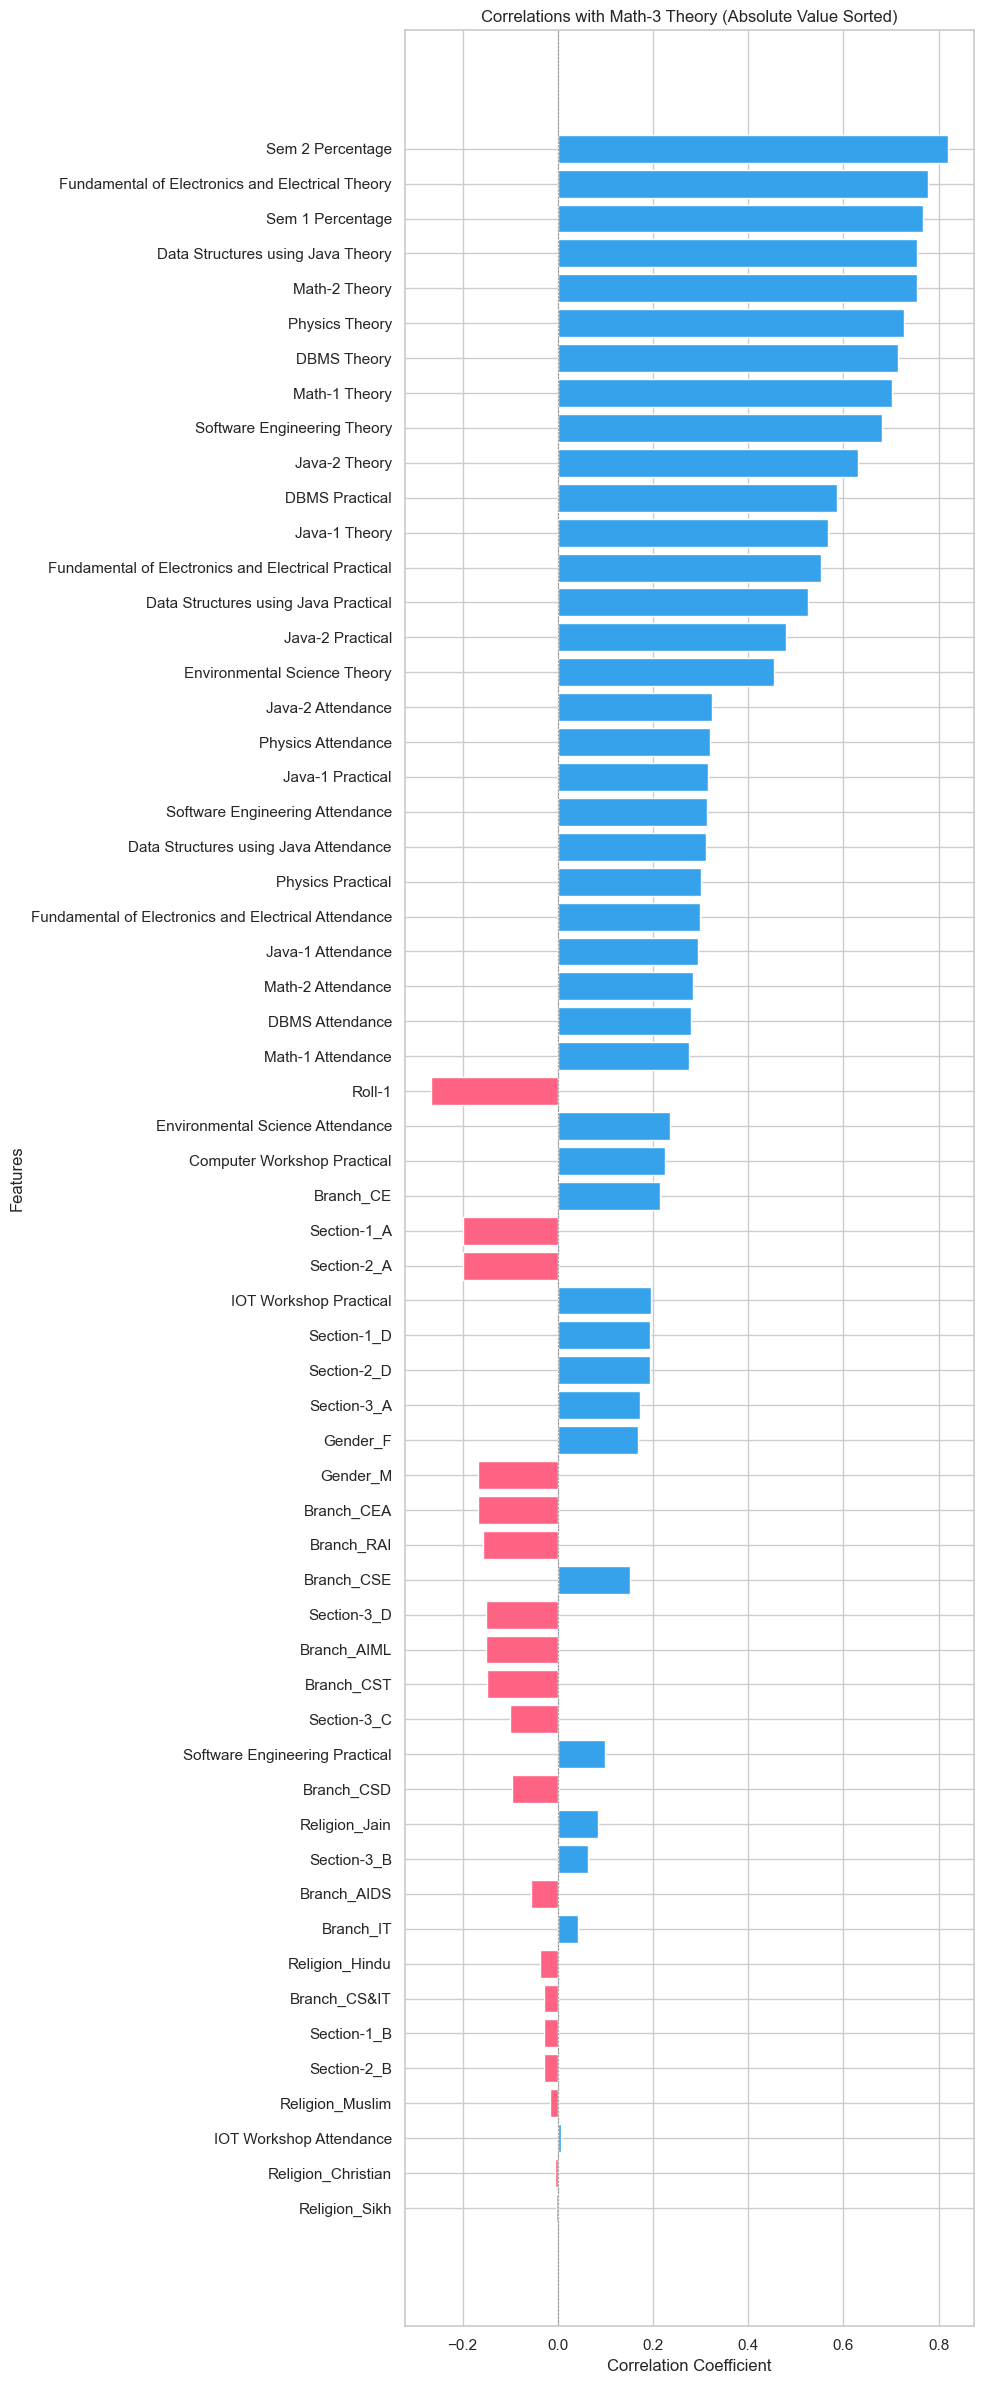

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]


# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Math-3 Theory
for col in numeric_cols:
    if col != "Math-3 Theory":  # Exclude the target itself, mentor columns
        corr = df[col].corr(df["Math-3 Theory"])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df["Math-3 Theory"])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if "Roll-1" in df.columns:
    corr = df["Roll-1"].astype(float).corr(df["Math-3 Theory"])
    correlations["Roll-1"] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(
    sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
)

# Print sorted correlations
print("\nCorrelations with Math-3 Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(
    figsize=(10, max(8, len(labels) * 0.4))
)  # Adjust height based on number of features
plt.barh(
    labels[::-1],
    values[::-1],
    color=np.where(np.array(values[::-1]) >= 0, "#36A2EB", "#FF6384"),
)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Correlations with Math-3 Theory (Absolute Value Sorted)")
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of math_train_data.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Wo

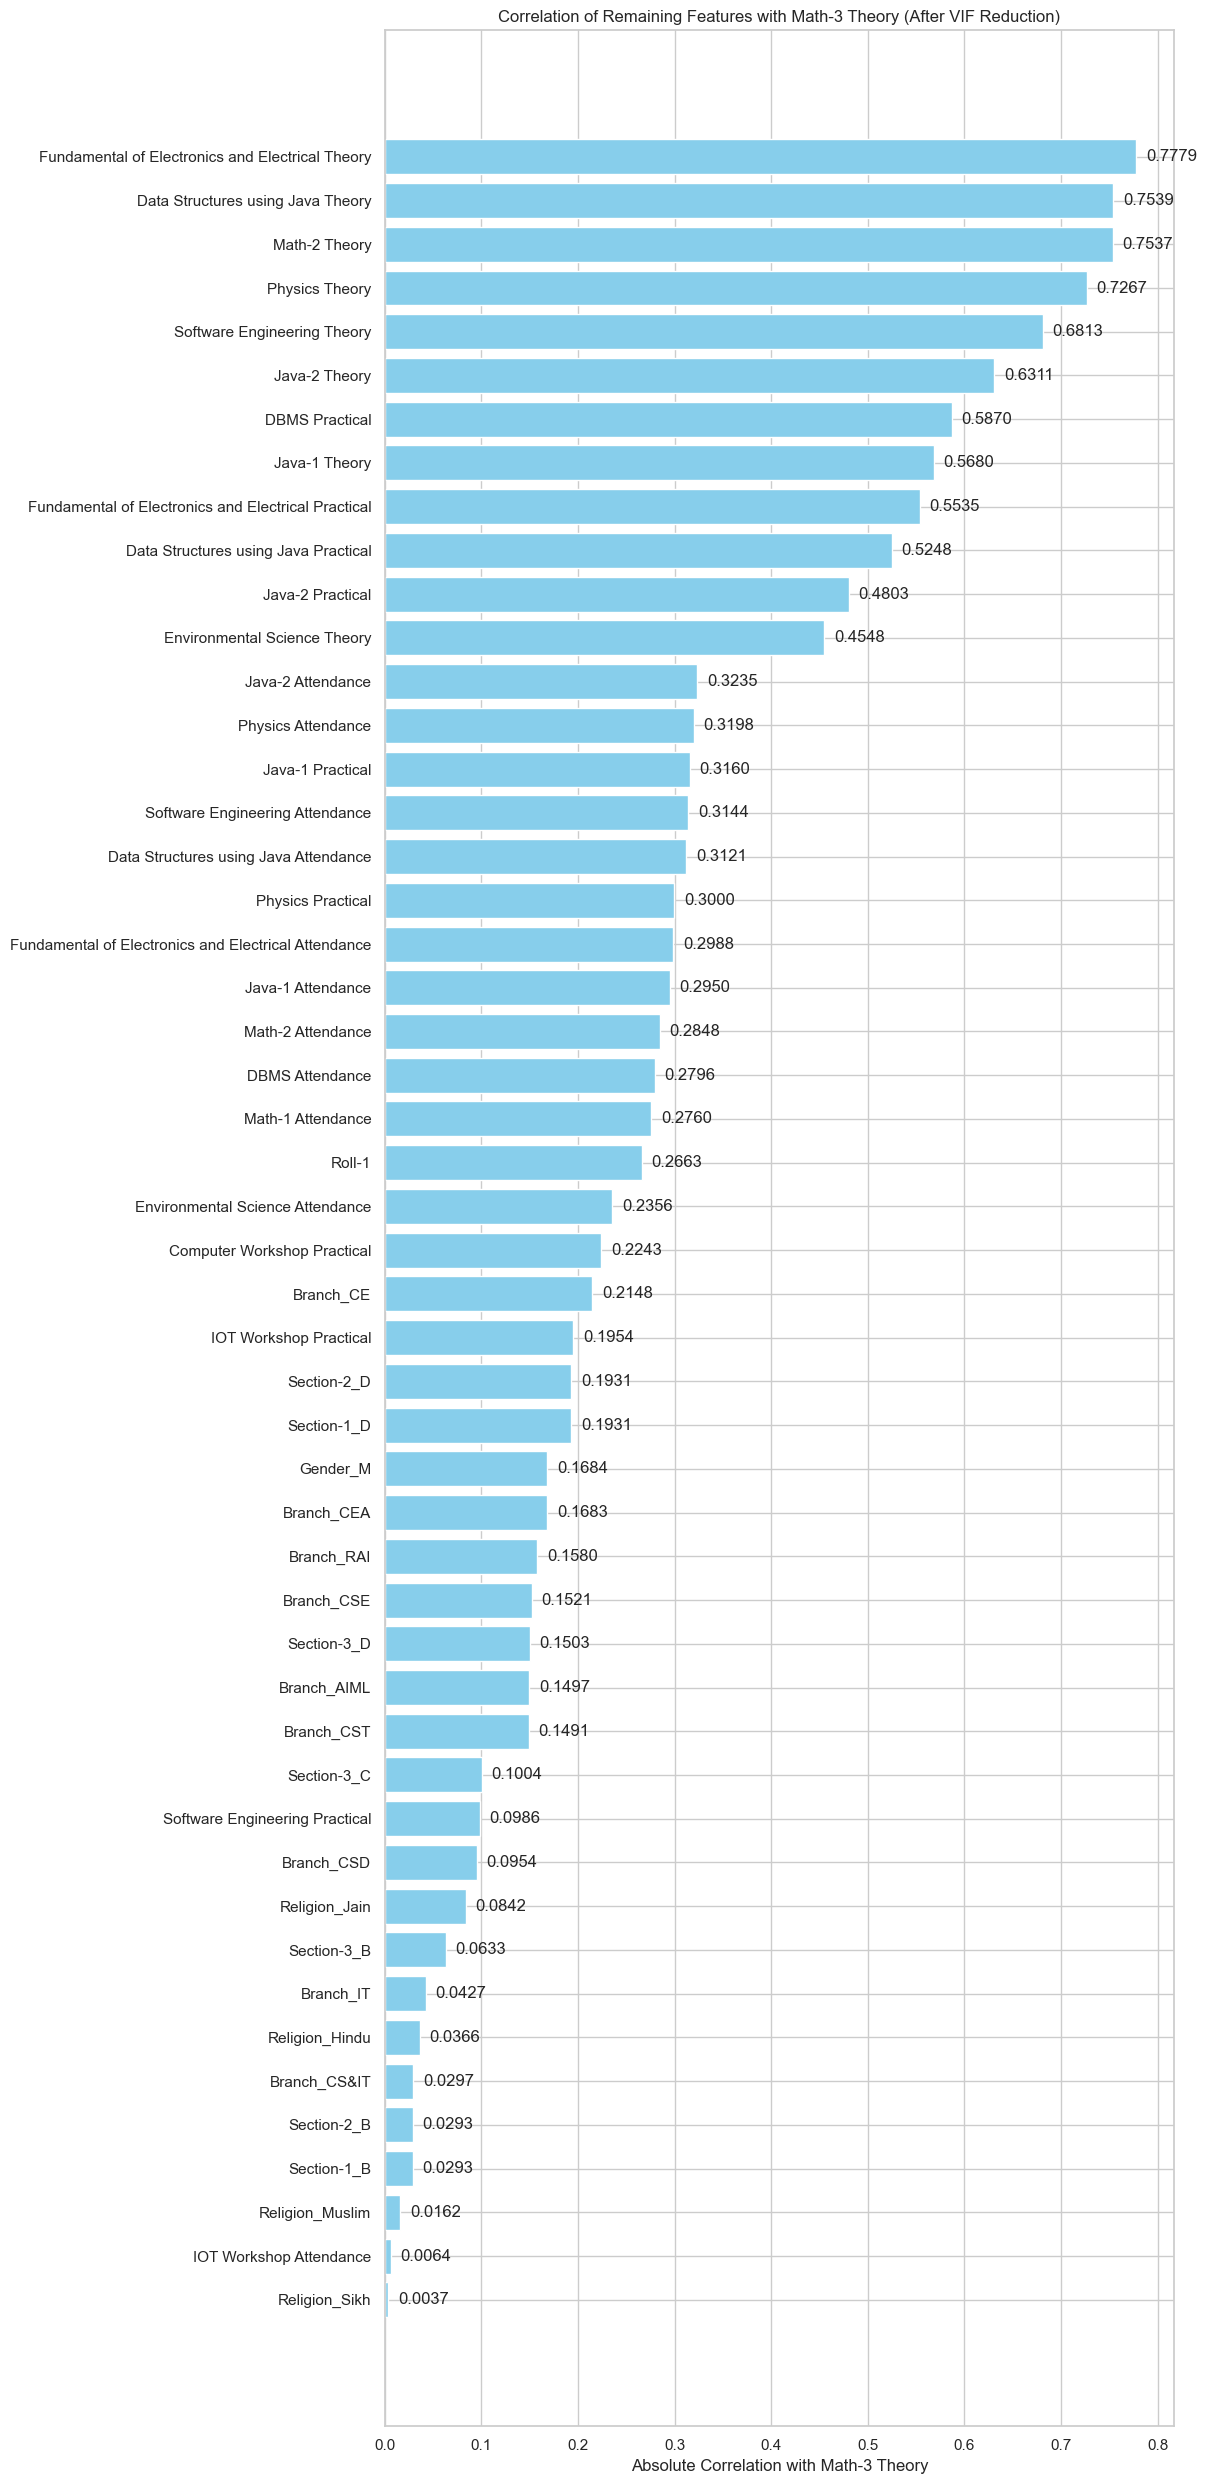


Final selected features (excluding target):
['Roll-1', 'Physics Theory', 'Physics Practical', 'Java-1 Theory', 'Java-1 Practical', 'Software Engineering Theory', 'Software Engineering Practical', 'Environmental Science Theory', 'IOT Workshop Practical', 'Computer Workshop Practical', 'Math-2 Theory', 'Data Structures using Java Theory', 'Data Structures using Java Practical', 'DBMS Practical', 'Fundamental of Electronics and Electrical Theory', 'Fundamental of Electronics and Electrical Practical', 'Java-2 Theory', 'Java-2 Practical', 'Math-1 Attendance', 'Physics Attendance', 'Java-1 Attendance', 'Software Engineering Attendance', 'Environmental Science Attendance', 'IOT Workshop Attendance', 'Math-2 Attendance', 'Data Structures using Java Attendance', 'DBMS Attendance', 'Fundamental of Electronics and Electrical Attendance', 'Java-2 Attendance', 'Gender_M', 'Religion_Hindu', 'Religion_Jain', 'Religion_Muslim', 'Religion_Sikh', 'Branch_AIML', 'Branch_CE', 'Branch_CEA', 'Branch_CS&IT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Ensure plots display inline in Jupyter Notebook
# %matplotlib inline # This line is for Jupyter Notebook, will cause error if run as a script

# Read the math train data
try:
    df = pd.read_csv("../train_dataset.csv")
except FileNotFoundError:
    print(
        "Error: 'train_dataset.csv' not found. Please ensure the file path is correct."
    )
    exit()


# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    if section in df.columns:  # Check if column exists
        df[section] = (
            df[section].astype(str).str[0]
        )  # Ensure it's string type before .str accessor

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Create a DataFrame for VIF calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]:
        try:
            encoded = pd.get_dummies(
                df[col], prefix=col, drop_first=True
            )  # drop_first to avoid perfect multicollinearity
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded = df_encoded.drop(columns=[col])
        except Exception as e:
            print(f"Could not encode column {col}: {e}")


# Ensure all columns are numeric for VIF calculation and handle potential NaNs
df_for_vif = df_encoded.drop(columns=["Math-3 Theory"], errors="ignore").copy()
df_for_vif = df_for_vif.select_dtypes(
    include=[np.number]
)  # Select only numeric columns
df_for_vif = df_for_vif.fillna(
    df_for_vif.mean()
)  # Fill NaNs with mean, or choose another strategy

# Add constant for VIF calculation if not already present (VIF expects an intercept)
# However, VIF is typically calculated on the independent variables.
# If 'Math-3 Theory' is your target, you calculate VIF on the features.
X_vif = df_for_vif.copy()

# Check if 'Math-3 Theory' is in the original df_encoded to calculate correlations later
target_variable = "Math-3 Theory"
if target_variable not in df_encoded.columns:
    print(
        f"Warning: Target variable '{target_variable}' not found in df_encoded. Correlations with target cannot be computed."
    )
    correlations_with_math = {}
else:
    # 1. Create dictionary of absolute correlations with Math-3 Theory
    correlations_with_math = {}
    for col in df_encoded.columns:
        if col != target_variable and pd.api.types.is_numeric_dtype(
            df_encoded[col]
        ):  # Ensure column is numeric
            try:
                corr = abs(df_encoded[col].corr(df_encoded[target_variable]))
                correlations_with_math[col] = corr
            except Exception as e:
                print(
                    f"Could not calculate correlation for {col} with {target_variable}: {e}"
                )
        elif col != target_variable:
            print(
                f"Skipping non-numeric column {col} for correlation with {target_variable}."
            )


# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with Math-3 Theory:")
if correlations_with_math:
    for col, corr in sorted(
        correlations_with_math.items(), key=lambda x: x[1], reverse=True
    ):
        print(f"{col}: {corr:.4f}")
else:
    print("No correlations to display.")

# --- VIF Calculation ---
print("\nCalculating VIF...")
# Add constant term for VIF calculation (intercept) if your model will have one.
# VIF is calculated on the independent variables.
X_vif_const = add_constant(
    X_vif, has_constant="add"
)  # Adds a constant column for intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif_const.values, i)
    for i in range(X_vif_const.shape[1])
]
vif_data = vif_data[vif_data["feature"] != "const"]  # Remove const VIF
print("\nInitial VIF values:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Iteratively remove features with VIF > threshold (e.g., 5 or 10)
threshold_vif = 10
columns_to_drop_vif = []
features_for_vif_iter = X_vif.copy()  # Start with all features (excluding target)

while True:
    if (
        features_for_vif_iter.empty or features_for_vif_iter.shape[1] < 2
    ):  # Need at least 2 features for VIF
        print(
            "\nNot enough features to calculate VIF or all high VIF features removed."
        )
        break

    # Add constant for VIF calculation in each iteration
    temp_X_vif_const = add_constant(features_for_vif_iter, has_constant="add")

    vif_iter = pd.DataFrame()
    vif_iter["feature"] = temp_X_vif_const.columns
    try:
        vif_iter["VIF"] = [
            variance_inflation_factor(temp_X_vif_const.values, i)
            for i in range(temp_X_vif_const.shape[1])
        ]
    except Exception as e:  # Catch potential errors like singular matrix
        print(f"Error calculating VIF: {e}. Stopping VIF reduction.")
        break

    vif_iter = vif_iter[vif_iter["feature"] != "const"]  # Remove const
    max_vif_row = vif_iter.sort_values(by="VIF", ascending=False).iloc[0]

    if max_vif_row["VIF"] > threshold_vif:
        feature_to_drop = max_vif_row["feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif_row['VIF']:.2f}")

        # We need to decide how to drop: based purely on VIF or considering correlation with target
        # Original logic tried to keep feature more correlated with target.
        # For VIF, typically the highest VIF feature is dropped.
        # Let's stick to dropping the highest VIF feature first.
        # If you want to incorporate correlation with target, the logic would be more complex:
        # e.g., among features with VIF > threshold, drop the one with lowest corr with target.

        columns_to_drop_vif.append(feature_to_drop)
        features_for_vif_iter = features_for_vif_iter.drop(columns=[feature_to_drop])
    else:
        print("\nAll remaining features have VIF below threshold.")
        break

print("\nColumns to drop based on VIF >", threshold_vif, ":")
print(
    columns_to_drop_vif if columns_to_drop_vif else "No columns to drop based on VIF."
)

# Create reduced DataFrame after VIF
df_reduced_vif = df_encoded.drop(columns=columns_to_drop_vif, errors="ignore")
print(f"\nShape of df_encoded: {df_encoded.shape}")
print(f"Shape of df_reduced_vif: {df_reduced_vif.shape}")
print("\nRemaining columns after VIF reduction:")
print(df_reduced_vif.columns.tolist())


# 3. Plot correlations as a bar plot (using original correlations, for features remaining after VIF)
# Update correlations_with_math to only include remaining features
correlations_remaining = {
    col: corr
    for col, corr in correlations_with_math.items()
    if col in df_reduced_vif.columns and col != target_variable
}


if correlations_remaining:
    plt.figure(
        figsize=(12, max(8, len(correlations_remaining) * 0.5))
    )  # Adjust height based on number of features
    sorted_correlations_remaining = dict(
        sorted(correlations_remaining.items(), key=lambda item: item[1])
    )

    bars = plt.barh(
        list(sorted_correlations_remaining.keys()),
        list(sorted_correlations_remaining.values()),
        color="skyblue",
    )
    plt.xlabel(f"Absolute Correlation with {target_variable}")
    plt.title(
        f"Correlation of Remaining Features with {target_variable} (After VIF Reduction)"
    )
    plt.tight_layout()

    # Add correlation values on the bars
    for bar_obj in bars:  # Renamed 'bar' to 'bar_obj' to avoid conflict
        width = bar_obj.get_width()
        plt.text(
            x=width + 0.01,
            y=bar_obj.get_y() + bar_obj.get_height() / 2,
            s=f"{width:.4f}",
            ha="left",
            va="center",
        )
    plt.show()
else:
    print("\nNo correlations to plot after VIF reduction or target variable issues.")

print("\nFinal selected features (excluding target):")
final_features = [col for col in df_reduced_vif.columns if col != target_variable]
print(final_features)

# Linear Regression

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)


# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)


# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss)")
print("Approach: multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression (MSE loss)",
            "Approach": "multivariate regression + 5-Fold cv + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss)
Approach: multivariate regression + 5-Fold cv + one-hot encoding
MAE: 6.6619


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss)")
print("Approach: q=0.5 + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss)",
            "Approach": "q=0.5 + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss)
Approach: q=0.5 + 5-Fold cv + one-hot encoding
MAE: 6.7859


In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)
# Without dropping High VIF columns: MAE: 6.6619

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss + High VIF columns dropped)")
print("Approach: Multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression (MSE loss + High VIF columns dropped)",
            "Approach": "Multivariate regression + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss + High VIF columns dropped)
Approach: Multivariate regression + 5-Fold cv + one-hot encoding
MAE: 6.6735


In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")
# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss, High VIF columns dropped)")
print("Approach: q=0.5 + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss High VIF columns dropped)",
            "Approach": "q=0.5 + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss, High VIF columns dropped)
Approach: q=0.5 + 5-Fold cv + one-hot encoding
MAE: 6.7705


## Loss Function Comparison: MSE vs MAE

We ran a series of controlled experiments to compare models trained using **MSE loss** (Ordinary Least Squares) and **MAE loss** (Quantile Regression with q=0.5).  
All models were evaluated using **Mean Absolute Error (MAE)** under 5-Fold Cross-Validation.

Despite MAE loss being theoretically more robust to outliers, it consistently performed **worse** on our dataset.  
In contrast, models trained using **MSE loss achieved lower MAE**, indicating better predictive accuracy.

This suggests that the residuals in our data are approximately symmetric and not heavy-tailed—conditions under which MSE-trained models are statistically more efficient.

As a result, we have chosen to proceed with **MSE-based training**, as it generalizes better for our use case.


## Why We Are Not Dropping High-VIF Columns

We conducted controlled experiments to assess the impact of removing features with **high Variance Inflation Factor (VIF)** on model performance. While the principle of reducing multicollinearity by dropping these features might seem theoretically sound, our results showed a ** consistent drop in model accuracy** whenever these high-VIF columns were eliminated.

### Key Observations
- **Data/Information Loss**: Despite being correlated, these features still contain valuable information about the target. Removing them leads to the loss of that information, which can degrade the model’s predictive power.  
- **Practical Performance Over Theory**: Theoretically, highly correlated features can inflate variance estimates in regression coefficients. However, our empirical results suggest that the information these features provide outweighs the potential downsides.  
- **Model Accuracy**: Models trained with all features, including high-VIF ones, consistently outperformed the versions where high-VIF columns were removed. This was observed across multiple runs and cross-validation folds.

Hence, **we are retaining the high-VIF columns**: their removal causes worse performance due to the critical information they hold about our target variable, making them valuable features in our predictive models.

## Checking Residual Normality in Multiple Linear Regression

We will:
- Use the same data preprocessing and model setup we used above in multiple linear regression.  
- Manually perform the cross-validation splits to collect residuals (since `cross_val_score` alone doesn’t provide them).  
- Inspect residual distribution via histogram, Q-Q plot, and a normality test.

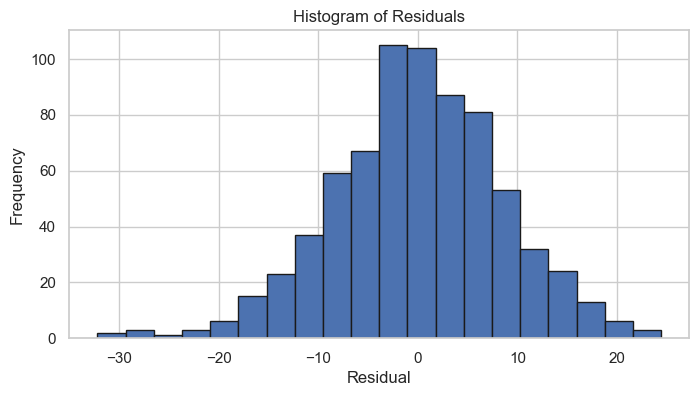

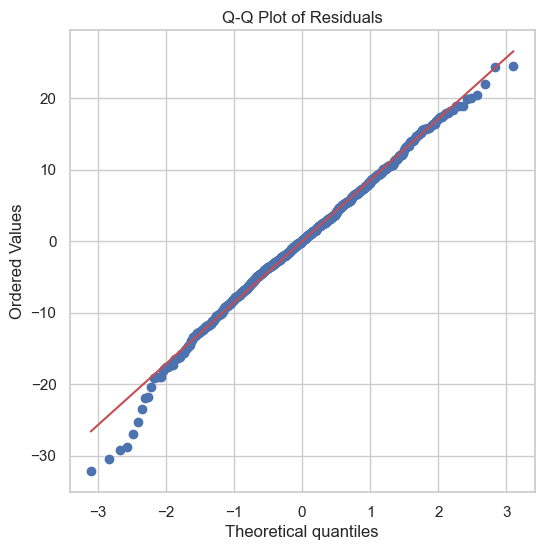

Shapiro-Wilk Test: statistic=0.994, p-value=0.006
Residuals do not appear normally distributed (reject H0).


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Data Preprocessing ---
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in each Section column
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# --- Model ---
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Collect Residuals ---
all_residuals = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Residuals = actual - predicted
    residuals = y_test - y_pred
    all_residuals.extend(residuals)

all_residuals = np.array(all_residuals)

# --- Basic Residual Diagnostics ---
# 1. Histogram
plt.figure(figsize=(8, 4))
plt.hist(all_residuals, bins=20, edgecolor="k")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(all_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Normality Test (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(all_residuals)
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

# Interpretation of Shapiro-Wilk
if shapiro_p > 0.05:
    print("Residuals appear to come from a normal distribution (fail to reject H0).")
else:
    print("Residuals do not appear normally distributed (reject H0).")

# Polynomial Regression

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print(
    "Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding"
)
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 29.1336


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print("Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 2)
Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped
MAE: 30.4490


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 3)",
            "Approach": "5-Fold CV + one-hot encoding + degree 3",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding
MAE: 16.6254


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")


# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: 5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 3)",
            "Approach": "5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 3)
Approach: 5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped
MAE: 17.1186


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: 5-Fold CV + one-hot encoding + degree 4")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 4)",
            "Approach": "5-Fold CV + one-hot encoding + degree 4",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 4)
Approach: 5-Fold CV + one-hot encoding + degree 4
MAE: 15.5107


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: 5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 4)",
            "Approach": "5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 4)
Approach: 5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped
MAE: 15.5209


### Polynomial Regression: Why We Stop at Degree 4

Polynomial regression was explored to model non-linear patterns in the data. While degree 2 and degree 3 models ran successfully, and **degree 4 was the highest that completed without crashing**, attempting **degree 5 caused a memory blowup**.

Specifically, the number of generated features exceeded **5 million**, requiring over **21 GB of RAM** during cross-validation. This is a result of the **combinatorial explosion** caused by high-degree polynomial feature generation, especially after one-hot encoding categorical variables.

To keep the process computationally feasible and stable, we **cap polynomial regression at degree 4**.


# Support Vector Regression (SVR)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename Div columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in section codes
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)


# Define features and target
target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Build pipeline: Standardize -> SVR
svr_pipeline = make_pipeline(
    StandardScaler(), SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1)
)

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    svr_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Support Vector Regression (RBF)")
print("Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Support Vector Regression (RBF)",
            "Approach": "5-Fold CV + one-hot encoding + StandardScaler",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Support Vector Regression (RBF)
Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF
MAE: 8.2742


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename Div columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in section codes
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Drop high-VIF columns
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define features and target
target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Build pipeline: Standardize -> SVR
svr_pipeline = make_pipeline(
    StandardScaler(), SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1)
)

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    svr_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Support Vector Regression (RBF)")
print(
    "Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Support Vector Regression (RBF)",
            "Approach": "5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Support Vector Regression (RBF)
Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped
MAE: 8.2850


# Random forest regressor

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
import os
import warnings

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Didn't drop columns with high internal correlation because tree based structures handel them well

# Define target and feature columns
target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Define model pipeline (no preprocessor needed since categorical columns are already encoded)
model = Pipeline(
    steps=[
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Suppress specific sklearn warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
    neg_mae_scores = cross_val_score(
        model, X, y, cv=kf, scoring="neg_mean_absolute_error"
    )

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Random Forest Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor",
            "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 6.8736


In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define model pipeline
tuned_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=200,
                min_samples_split=2,
                min_samples_leaf=2,
                max_features="sqrt",
                max_depth=20,
                random_state=42,
            ),
        ),
    ]
)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    tuned_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print(
    "Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
    "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": "{'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
            "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.8051


In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define model pipeline with updated hyperparameters
tuned_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=1000,
                min_samples_split=5,
                min_samples_leaf=4,
                max_features=None,
                max_depth=None,
                random_state=42,
            ),
        ),
    ]
)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    tuned_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print(
    "Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
    "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": "{'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
            "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}
MAE: 6.8434


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define model pipeline with the specified tuned hyperparameters
tuned_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=500,
                min_samples_split=10,
                min_samples_leaf=3,
                max_features=0.5,
                max_depth=None,
                random_state=42,
            ),
        ),
    ]
)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    tuned_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print(
    "Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
    "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": "{'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
            "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}
MAE: 6.7528


In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]


# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define model pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    "regressor__n_estimators": [100, 200, 500, 1000],
    "regressor__max_depth": [10, 20, 30, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__max_features": ["sqrt", "log2", None],  # Removed 'auto'
}


# Use 5-Fold CV for tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring="neg_mean_absolute_error",
    cv=kf,
    random_state=42,
    n_jobs=-1,
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X, y)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert back from neg MAE to MAE

# Print results to terminal
print("Model: Random Forest Regressor(tuned)")
print("Parameters:", best_params)
print(f"MAE: {best_score:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": best_params,
            "MAE": round(best_score, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor(tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.7841


In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Add Semester 1 and 2 percentage features
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename and simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define the tuned Random Forest model
tuned_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=1000,
                min_samples_split=10,
                min_samples_leaf=3,
                max_features=0.5,
                max_depth=30,
                random_state=42,
            ),
        ),
    ]
)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    tuned_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Random Forest Regressor (Tuned)")
print(
    "Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
    "'max_features': 0.5, 'max_depth': 30}"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": "{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
            "'max_features': 0.5, 'max_depth': 30}",
            "MAE": round(mean_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 30}
MAE: 6.7535


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the correct dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Create Semester 1 and 2 percentage features
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename and simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Handle outliers in target using IQR
target_col = "Math-3 Theory"
Q1, Q3 = df[target_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR))]

# Define target and features
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric features
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            categorical_cols,
        ),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# Full pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42)),
    ]
)

# Hyperparameter tuning setup
param_distributions = {
    "regressor__n_estimators": [100, 200, 500],
    "regressor__max_depth": [10, 20, 30, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 3],
    "regressor__max_features": ["sqrt", 0.5, None],
}

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=25,
    scoring="neg_mean_absolute_error",
    cv=kf,
    random_state=42,
    n_jobs=-1,
)

# Fit model
random_search.fit(X, y)

# Best model and results
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Feature importances
feature_importances = best_model.named_steps["regressor"].feature_importances_
feature_names = (
    best_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_cols)
    .tolist()
    + numeric_cols
)
importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
)
print(
    "Feature Importances:\n",
    importance_df.sort_values(by="Importance", ascending=False),
)

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": best_params,
            "MAE": round(best_score, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

# Output summary
print("Model: Random Forest Regressor (Tuned)")
print("Approach:", best_params)
print(f"MAE: {best_score:.4f}")

Feature Importances:
                                               Feature  Importance
53                                   Sem 2 Percentage    0.155293
32                                      Math-2 Theory    0.118347
33                  Data Structures using Java Theory    0.087378
37   Fundamental of Electronics and Electrical Theory    0.086001
52                                   Sem 1 Percentage    0.077944
23                                     Physics Theory    0.066811
35                                        DBMS Theory    0.053298
22                                      Math-1 Theory    0.047236
27                        Software Engineering Theory    0.039890
36                                     DBMS Practical    0.031186
25                                      Java-1 Theory    0.024594
39                                      Java-2 Theory    0.020092
38  Fundamental of Electronics and Electrical Prac...    0.018204
29                       Environmental Science Theory 

In [24]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.base import BaseEstimator, TransformerMixin

warnings.filterwarnings("ignore")


df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]


# Custom Winsorizer
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.01, upper=0.99):
        self.lower = lower
        self.upper = upper

    def fit(self, X, y=None):
        self.lower_bounds_ = X.quantile(self.lower)
        self.upper_bounds_ = X.quantile(self.upper)
        return self

    def transform(self, X):
        # Must specify axis=1 since our lower/upper bounds have columns as the index
        return X.clip(lower=self.lower_bounds_, upper=self.upper_bounds_, axis=1)


# Features
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]

# Use top 25 features importance list
top_features = [
    "Sem 2 Percentage",
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Sem 1 Percentage",
    "Physics Theory",
    "DBMS Theory",
    "Math-1 Theory",
    "Software Engineering Theory",
    "DBMS Practical",
    "Java-1 Theory",
    "Java-2 Theory",
    "Fundamental of Electronics and Electrical Practical",
    "Environmental Science Theory",
    "Data Structures using Java Practical",
    "Java-2 Attendance",
    "Data Structures using Java Attendance",
    "Software Engineering Attendance",
    "Fundamental of Electronics and Electrical Attendance",
    "Roll-1",
    "Java-1 Attendance",
    "Math-1 Attendance",
    "Math-2 Attendance",
    "Computer Workshop Practical",
    "Physics Attendance",
]

# Add relevant categorical columns (one-hot encoding will handle dummy drop)
top_features += categorical_cols
X = X[top_features]

# Identify numeric columns (excluding categoricals)
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    [
        (
            "num",
            Pipeline([("winsor", Winsorizer()), ("scaler", StandardScaler())]),
            numeric_cols,
        ),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ]
)

# Tuned Random Forest Model
model = Pipeline(
    [
        ("preprocess", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=1000,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=2,
                max_features=0.3,
                bootstrap=True,
                random_state=42,
                n_jobs=-1,
            ),
        ),
    ]
)

# Cross-Validation MAE
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = -1 * cross_val_score(
    model, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

print("Model: Random Forest Regressor (Tuned)")
print(
    "Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}"
)
print(f"Mean MAE: {mae_scores.mean():.4f}")

# --- Log Results to CSV ---
results_df = pd.DataFrame(
    [
        {
            "Model": "Random Forest Regressor (Tuned)",
            "Approach": "{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}",
            "MAE": round(mae_scores.mean(), 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}
Mean MAE: 6.7025


# XGBoost

In [25]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define the XGBoost pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(random_state=42, verbosity=0)),
    ]
)

# 5-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: XGBoost Regressor")
print("Approach: Full-feature regression + OneHotEncoding + 5-Fold CV")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "XGBoost Regressor",
            "Approach": "Full-feature regression + OneHotEncoding + 5-Fold CV",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: XGBoost Regressor
Approach: Full-feature regression + OneHotEncoding + 5-Fold CV
MAE: 7.2612


In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define the XGBoost pipeline
xgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(random_state=42, verbosity=0)),
    ]
)

# Define parameter grid
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.01, 0.05, 0.1],
    "regressor__colsample_bytree": [0.8, 0.9, 1.0],
    "regressor__subsample": [0.8, 0.9, 1.0],
}

# Set up GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=kf,
    verbose=1,
    n_jobs=-1,
)

# Fit the GridSearchCV
grid_search.fit(X, y)

# Extract best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model with cross-validation
neg_mae_scores = cross_val_score(
    best_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: XGBoost Regressor (Tuned)")
print(f"Best Params: {best_params}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "XGBoost Regressor",
            "Approach": f"Tuned (Best Params: {best_params})",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Model: XGBoost Regressor (Tuned)
Best Params: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 50, 'regressor__subsample': 0.9}
MAE: 6.7045


In [27]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section columns
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].astype(str).str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Tuned XGBoost Regressor with best params
xgb_best = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.9,
    random_state=42,
    verbosity=0,
)

# Final pipeline
model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", xgb_best)])

# 5-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: XGBoost Regressor(Tuned)")
print(
    "Approach: Tuned (Best Params: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.9})"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "XGBoost Regressor(Tuned)",
            "Approach": "Tuned (Best Params: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.9})",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: XGBoost Regressor(Tuned)
Approach: Tuned (Best Params: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.9})
MAE: 6.6720


# LightGBM

In [28]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings  # For suppressing warnings
import os

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Add Semester 1 and 2 percentage features
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename and simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define LightGBM model pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor(random_state=42, verbose=-1)),
    ]
)

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: LightGBM Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "LightGBM Regressor",
            "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: LightGBM Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 7.2994


In [29]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Add percentage features
df["Sem 1 Percentage"] = (
    df[
        [
            "Math-1 Theory",
            "Physics Theory",
            "Java-1 Theory",
            "Software Engineering Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)
df["Sem 2 Percentage"] = (
    df[
        [
            "Math-2 Theory",
            "Data Structures using Java Theory",
            "DBMS Theory",
            "Fundamental of Electronics and Electrical Theory",
            "Java-2 Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)

# Simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].astype(str).str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify column types
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define base pipeline
base_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor(random_state=42, verbose=-1)),
    ]
)

# Define parameter grid
param_distributions = {
    "regressor__num_leaves": [20, 31, 50, 70],
    "regressor__max_depth": [3, 5, 7, 9, -1],
    "regressor__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.1],
    "regressor__n_estimators": [100, 200, 300, 500],
    "regressor__subsample": [0.7, 0.8, 0.9, 1.0],
    "regressor__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

# Setup 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run randomized search
random_search = RandomizedSearchCV(
    base_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

# Fit search
random_search.fit(X, y)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Print best results
print("Model: LightGBM Regressor (Tuned)")
print("Best Params:", best_params)
print(f"Best MAE: {best_score:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "LightGBM Regressor (Tuned)",
            "Approach": f"Tuned with RandomizedSearchCV (params: {best_params})",
            "MAE": round(best_score, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model: LightGBM Regressor (Tuned)
Best Params: {'regressor__subsample': 1.0, 'regressor__num_leaves': 50, 'regressor__n_estimators': 300, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 1.0}
Best MAE: 6.7978


In [30]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Add percentage features
df["Sem 1 Percentage"] = (
    df[
        [
            "Math-1 Theory",
            "Physics Theory",
            "Java-1 Theory",
            "Software Engineering Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)
df["Sem 2 Percentage"] = (
    df[
        [
            "Math-2 Theory",
            "Data Structures using Java Theory",
            "DBMS Theory",
            "Fundamental of Electronics and Electrical Theory",
            "Java-2 Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)

# Simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].astype(str).str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify column types
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define base pipeline
base_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor(random_state=42, verbose=-1)),
    ]
)

# Define optimized parameter grid
param_distributions = {
    "regressor__num_leaves": [20, 31, 50, 70],
    "regressor__max_depth": [3, 5, 7, 9, -1],
    "regressor__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.1],
    "regressor__n_estimators": [100, 200, 300, 500],
    "regressor__subsample": [0.7, 0.8, 0.9, 1.0],
    "regressor__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "regressor__min_child_samples": [10, 20, 30],
}

# Setup 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run randomized search
random_search = RandomizedSearchCV(
    base_pipeline,
    param_distributions=param_distributions,
    n_iter=40,  # Slightly more than before
    scoring="neg_mean_absolute_error",
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

# Fit search
random_search.fit(X, y)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Print best results
print("Model: LightGBM Regressor (Tuned)")
print("Best Params:", best_params)
print(f"Best MAE: {best_score:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "LightGBM Regressor (Tuned)",
            "Approach": f"Tuned with RandomizedSearchCV (params: {best_params})",
            "MAE": round(best_score, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Model: LightGBM Regressor (Tuned)
Best Params: {'regressor__subsample': 0.8, 'regressor__num_leaves': 70, 'regressor__n_estimators': 500, 'regressor__min_child_samples': 30, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 0.7}
Best MAE: 6.7707


In [31]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import warnings
import os

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Add percentage features
df["Sem 1 Percentage"] = (
    df[
        [
            "Math-1 Theory",
            "Physics Theory",
            "Java-1 Theory",
            "Software Engineering Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)
df["Sem 2 Percentage"] = (
    df[
        [
            "Math-2 Theory",
            "Data Structures using Java Theory",
            "DBMS Theory",
            "Fundamental of Electronics and Electrical Theory",
            "Java-2 Theory",
        ]
    ]
    .mean(axis=1)
    .round(2)
)

# Simplify section columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].astype(str).str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Remove outliers using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
mask = (y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR)
X, y = X[mask], y[mask]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Define base pipeline
base_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", LGBMRegressor(random_state=42, verbose=-1)),
    ]
)

# Define Bayesian parameter space
param_distributions = {
    "regressor__num_leaves": Integer(20, 100),
    "regressor__max_depth": Integer(3, 9),
    "regressor__learning_rate": Real(0.005, 0.05, prior="log-uniform"),
    "regressor__n_estimators": Integer(100, 600),
    "regressor__subsample": Real(0.7, 1.0),
    "regressor__colsample_bytree": Real(0.7, 1.0),
    "regressor__reg_alpha": Real(0.0, 0.3),
    "regressor__reg_lambda": Real(0.0, 0.3),
    "regressor__min_child_samples": Integer(10, 50),
}

# Setup 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run Bayesian search
search = BayesSearchCV(
    base_pipeline,
    search_spaces=param_distributions,
    n_iter=60,
    scoring="neg_mean_absolute_error",
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

# Fit search
search.fit(X, y)
best_model = search.best_estimator_
best_params = search.best_params_
best_score = -search.best_score_

# Print best results
print("Model: LightGBM Regressor (Tuned)")
print("Best Params:", best_params)
print(f"Best MAE: {best_score:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "LightGBM Regressor (Tuned)",
            "Approach": f"Tuned with BayesSearchCV (params: {best_params})",
            "MAE": round(best_score, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Ridge

In [32]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),  # Standardize numeric features
    ]
)

# Initialize Ridge regressor
ridge_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=1.0)),  # Alpha is the regularization strength
    ]
)

# Use 5-Fold CV with negative MAE for Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_neg_mae_scores = cross_val_score(
    ridge_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)

# Print results to terminal
print("Model: Ridge Regression")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"MAE: {ridge_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression",
            "Approach": "Full-feature regression with 5-Fold CV and Regularization",
            "MAE": round(ridge_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression
Approach: Full-feature regression with 5-Fold CV and Regularization
MAE: 6.6617


In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define pipeline again
ridge_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", Ridge())]  # No alpha yet
)

# Alpha values to test
param_grid = {"regressor__alpha": np.logspace(-3, 3, 50)}

# Grid search with 5-fold CV on negative MAE
grid_search = GridSearchCV(
    ridge_pipeline,
    param_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_["regressor__alpha"]
best_mae = -grid_search.best_score_

# Print best results
print("Model: Ridge Regression (Tuned)")
print("Approach: Alpha tuning with GridSearchCV and 5-Fold CV")
print(f"Best Alpha: {best_alpha}")
print(f"MAE: {best_mae:.4f}")

# Log
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (Tuned)",
            "Approach": f"Tuned alpha={best_alpha:.4f} using GridSearchCV",
            "MAE": round(best_mae, 4),
        }
    ]
)
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (Tuned)
Approach: Alpha tuning with GridSearchCV and 5-Fold CV
Best Alpha: 44.98432668969444
MAE: 6.6212


In [34]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),  # Standardize numeric features
    ]
)

# Initialize Ridge regressor pipeline
ridge_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", Ridge())]
)

# Define parameter grid for alpha tuning
param_grid = {"regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Perform GridSearchCV to find the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    ridge_pipeline, param_grid, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1
)
grid_search.fit(X, y)

# Get the best model and its MAE
best_ridge_model = grid_search.best_estimator_
ridge_neg_mae_scores = cross_val_score(
    best_ridge_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)
best_alpha = grid_search.best_params_["regressor__alpha"]

# Print results to terminal
print("Model: Ridge Regression (Tuned)")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"Best Alpha: {best_alpha}")
print(f"MAE: {ridge_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (Tuned)",
            "Approach": f"Full-feature regression with 5-Fold CV and Regularization alpha: {best_alpha}",
            "MAE": round(ridge_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (Tuned)
Approach: Full-feature regression with 5-Fold CV and Regularization
Best Alpha: 100.0
MAE: 6.6304


In [35]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Feature selection: Select top 10 features based on correlation with target
selector = SelectKBest(score_func=f_regression, k=10)

# Create polynomial features for key numeric columns
poly_cols = ["Sem 1 Percentage", "Sem 2 Percentage"]
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
        (
            "poly",
            Pipeline(
                [
                    (
                        "selector",
                        ColumnTransformer(
                            [("select", "passthrough", poly_cols)], remainder="drop"
                        ),
                    ),
                    ("poly", poly_transformer),
                ]
            ),
            poly_cols,
        ),
    ]
)

# Initialize Ridge regressor pipeline with feature selection
ridge_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("selector", selector),
        ("regressor", Ridge()),
    ]
)

# Define parameter grid for alpha tuning
param_grid = {
    "regressor__alpha": [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    "selector__k": [5, 8, 10, 12],  # Tune number of features
}

# Perform GridSearchCV to find the best alpha and number of features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    ridge_pipeline, param_grid, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1
)
grid_search.fit(X, y)

# Get the best model and its MAE
best_ridge_model = grid_search.best_estimator_
ridge_neg_mae_scores = cross_val_score(
    best_ridge_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)
best_alpha = grid_search.best_params_["regressor__alpha"]
best_k = grid_search.best_params_["selector__k"]

# Print results to terminal
print("Model: Ridge Regression (Tuned)")
print("Approach: Feature selection and polynomial features with 5-Fold CV")
print(f"Best Alpha: {best_alpha}")
print(f"Best Number of Features: {best_k}")
print(f"MAE: {ridge_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (Tuned)",
            "Approach": f"Feature selection + polynomial features + 5-Fold CV + Best Alpha: {best_alpha} + Number of Features: {best_k}",
            "MAE": round(ridge_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (Tuned)
Approach: Feature selection and polynomial features with 5-Fold CV
Best Alpha: 10.0
Best Number of Features: 10
MAE: 6.7767


In [36]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 and 2 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Add percentage columns
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
poly_cols = ["Sem 1 Percentage", "Sem 2 Percentage"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        (
            "num",
            StandardScaler(),
            [col for col in numeric_cols if col not in poly_cols],
        ),
        ("poly", PolynomialFeatures(degree=2, include_bias=False), poly_cols),
    ]
)

# Ridge regression pipeline with feature selection
ridge_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("selector", SelectKBest(score_func=f_regression, k=10)),
        ("regressor", Ridge(alpha=10.0)),
    ]
)

# Cross-validation and scoring
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_neg_mae_scores = cross_val_score(
    ridge_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)

# Print results to terminal
print("Model: Ridge Regression (Tuned)")
print("Approach: Feature selection and polynomial features with 5-Fold CV")
print("Best Alpha: 10.0")
print("Best Number of Features: 10")
print(f"MAE: {ridge_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (Tuned)",
            "Approach": "Feature selection and polynomial features with 5-Fold CV Alpha: 10.0 Number of Features: 10",
            "MAE": round(ridge_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (Tuned)
Approach: Feature selection and polynomial features with 5-Fold CV
Best Alpha: 10.0
Best Number of Features: 10
MAE: 6.8055


In [37]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge  # Only Ridge is imported now
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
)  # Kept this import as it's useful for understanding MAE, though not directly used in cross_val_score with 'scoring' parameter.
import os

# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
# IMPORTANT: This code expects 'train_dataset.csv' to be in the parent directory.
# If the file is not found, a FileNotFoundError will be raised.
try:
    df = pd.read_csv("../train_dataset.csv")
except FileNotFoundError:
    print(
        "Error: 'train_dataset.csv' not found. Please ensure the file is in the correct directory (e.g., one level up from your script)."
    )
    # Exit the script if the dataset is missing, as it's essential for execution.
    exit()

# Drop columns identified as irrelevant or potential data leaks
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Calculate the average percentage for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Calculate the average percentage for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round the newly created percentage columns to two decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename division columns to section columns for consistent naming
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract only the department letter from section fields (e.g., 'A' from 'A1', 'B' from 'B2')
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define the target variable (what we aim to predict) and features (what we use for prediction)
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])  # All columns except the target are features
y = df[target_col]  # The target column itself

# Identify categorical and numeric columns for appropriate preprocessing
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Create a preprocessing pipeline using ColumnTransformer
# 'OneHotEncoder' is used for categorical features to convert them into a numerical format,
# dropping the first category to prevent multicollinearity.
# 'StandardScaler' is used for numerical features to normalize them, often beneficial for linear models.
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# Define the Ridge regression model pipeline
# This pipeline first applies the defined preprocessing steps and then fits the Ridge regressor.
ridge_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "regressor",
            Ridge(),
        ),  # Ridge model with default parameters, which GridSearchCV will tune
    ]
)

# Define the range of alpha values (regularization strength) to search over for Ridge
# np.logspace(-3, 3, 20) creates 20 evenly spaced values on a log scale from 10^-3 to 10^3.
alpha_grid = {"regressor__alpha": np.logspace(-3, 3, 20)}

# Set up 5-Fold Cross-Validation strategy for GridSearchCV
# 5 splits, shuffles the data, and sets a fixed random_state for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for Ridge regression
# 'scoring='neg_mean_absolute_error'' is used for hyperparameter tuning. GridSearchCV will find
# the alpha that minimizes the negative MAE (which means it maximizes MAE, effectively minimizing MAE).
# 'refit=True' ensures that the best estimator found by GridSearchCV is refitted on the entire dataset.
ridge_search = GridSearchCV(
    ridge_pipeline, alpha_grid, cv=kf, scoring="neg_mean_absolute_error", refit=True
)
ridge_search.fit(X, y)  # Fit GridSearchCV to find the best Ridge model
ridge_best_mae = (
    -ridge_search.best_score_
)  # Convert the best negative MAE score back to positive

# ---
## Ridge Regression Results
# Print the evaluation results for the best Ridge Regression model found by GridSearchCV
print("Model: Ridge Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(
    f"Best Alpha: {ridge_search.best_params_['regressor__alpha']:.4f}"
)  # Print the best alpha found
print(f"Mean Absolute Error (MAE): {ridge_best_mae:.4f}")

# Prepare results to be logged into a CSV file
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (tuned)",
            "Approach": f"Tuned regression with 5-Fold CV Best Alpha: {ridge_search.best_params_['regressor__alpha']:.4f}",
            "MAE": round(
                ridge_best_mae, 4
            ),  # Round MAE to 4 decimal places for logging
        }
    ]
)

# Define the path for the log file
log_file = "model_results_log.csv"

# Append the results to the CSV file. If the file doesn't exist, a header will be added automatically.
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 54.5559
Mean Absolute Error (MAE): 6.6215


In [38]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Feature selection: Select top 10 features based on correlation with target
selector = SelectKBest(score_func=f_regression, k=10)

# Create polynomial features for key numeric columns
poly_cols = ["Sem 1 Percentage", "Sem 2 Percentage"]
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
        (
            "poly",
            Pipeline(
                [
                    (
                        "selector",
                        ColumnTransformer(
                            [("select", "passthrough", poly_cols)], remainder="drop"
                        ),
                    ),
                    ("poly", poly_transformer),
                ]
            ),
            poly_cols,
        ),
    ]
)

# Initialize Ridge regressor pipeline with feature selection
ridge_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("selector", selector),
        ("regressor", Ridge()),
    ]
)

# Define parameter grid for alpha tuning
param_grid = {
    "regressor__alpha": [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    "selector__k": [5, 8, 10, 12],  # Tune number of features
}

# Perform GridSearchCV to find the best alpha and number of features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    ridge_pipeline, param_grid, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1
)
grid_search.fit(X, y)

# Get the best model and its MAE
best_ridge_model = grid_search.best_estimator_
ridge_neg_mae_scores = cross_val_score(
    best_ridge_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)
best_alpha = grid_search.best_params_["regressor__alpha"]
best_k = grid_search.best_params_["selector__k"]

# Print results to terminal
print("Model: Ridge Regression (Tuned)")
print("Approach: Feature selection and polynomial features with 5-Fold CV")
print(f"Best Alpha: {best_alpha}")
print(f"Best Number of Features: {best_k}")
print(f"MAE: {ridge_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (Tuned)",
            "Approach": f"Feature selection + polynomial features + 5-Fold CV + Best Alpha: {best_alpha} + Number of Features: {best_k}",
            "MAE": round(ridge_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (Tuned)
Approach: Feature selection and polynomial features with 5-Fold CV
Best Alpha: 10.0
Best Number of Features: 10
MAE: 6.7767


In [39]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric features
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Ridge pipeline
ridge_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", Ridge())])

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Broad alpha grid search
alpha_grid_broad = {"regressor__alpha": np.logspace(-3, 3, 20)}
ridge_search_broad = GridSearchCV(
    ridge_pipeline,
    alpha_grid_broad,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
ridge_search_broad.fit(X, y)
ridge_best_alpha_broad = ridge_search_broad.best_params_["regressor__alpha"]

# Refined alpha grid search
ridge_alpha_refined_grid = {
    "regressor__alpha": np.linspace(
        max(1e-5, ridge_best_alpha_broad * 0.5), ridge_best_alpha_broad * 1.5, 30
    )
}
ridge_search_refined = GridSearchCV(
    ridge_pipeline,
    ridge_alpha_refined_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
ridge_search_refined.fit(X, y)
ridge_best_mae = -ridge_search_refined.best_score_

# Print Results
print("Model: Ridge Regression (tuned)")
print(
    "Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search"
)
print(f"MAE: {ridge_best_mae:.4f}")

# Log to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Ridge Regression (tuned)",
            "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
            "MAE": round(ridge_best_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Ridge Regression (tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.6143


# Lasso

In [40]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import ElasticNet  # Changed from Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

warnings.filterwarnings("ignore")

try:
    df = pd.read_csv("../train_dataset.csv")
except FileNotFoundError:
    print(
        "Error: 'train_dataset.csv' not found. Please ensure the file is in the correct directory."
    )
    exit()

df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# Changed to ElasticNet
elastic_net_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=2000),
        ),  # l1_ratio=0.5 balances L1 and L2
    ]
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

elasticnet_neg_mae_scores = cross_val_score(
    elastic_net_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
elasticnet_mae_scores = -elasticnet_neg_mae_scores
elasticnet_mean_mae = np.mean(elasticnet_mae_scores)

print("Model: ElasticNet Regression")
print("Approach: Full-feature regression + 5-Fold CV and L1+L2 Regularization")
print(f"Mean Absolute Error (MAE): {elasticnet_mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "ElasticNet Regression",
            "Approach": "Full-feature regression + 5-Fold CV and L1+L2 Regularization",
            "MAE": round(elasticnet_mean_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: ElasticNet Regression
Approach: Full-feature regression + 5-Fold CV and L1+L2 Regularization
Mean Absolute Error (MAE): 6.6235


In [41]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# Lasso pipeline
lasso_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", Lasso(max_iter=10000)),  # Ensure convergence
    ]
)

# Alpha values to try
alpha_grid = {"regressor__alpha": np.logspace(-3, 3, 20)}

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch for Lasso
lasso_search = GridSearchCV(
    lasso_pipeline, alpha_grid, cv=kf, scoring="neg_mean_absolute_error", refit=True
)
lasso_search.fit(X, y)
lasso_best_mae = -lasso_search.best_score_

# Print results
print("\nModel: Lasso Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(f"Best Alpha: {lasso_search.best_params_['regressor__alpha']}")
print(f"MAE: {lasso_best_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Lasso Regression (tuned)",
            "Approach": f"Tuned regression + 5-Fold CV Best Alpha: {lasso_search.best_params_['regressor__alpha']}",
            "MAE": round(lasso_best_mae, 4),
        }
    ],
    columns=["Model", "Approach", "MAE"],
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Lasso Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 0.1623776739188721
MAE: 6.6270


In [42]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric features
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Lasso pipeline
lasso_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Lasso(max_iter=10000))]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Broad alpha grid search
alpha_grid_broad = {"regressor__alpha": np.logspace(-3, 3, 20)}
lasso_search_broad = GridSearchCV(
    lasso_pipeline,
    alpha_grid_broad,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
lasso_search_broad.fit(X, y)
lasso_best_alpha_broad = lasso_search_broad.best_params_["regressor__alpha"]

# Refined alpha grid search
lasso_alpha_refined_grid = {
    "regressor__alpha": np.linspace(
        max(1e-5, lasso_best_alpha_broad * 0.5), lasso_best_alpha_broad * 1.5, 30
    )
}
lasso_search_refined = GridSearchCV(
    lasso_pipeline,
    lasso_alpha_refined_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
lasso_search_refined.fit(X, y)
lasso_best_mae = -lasso_search_refined.best_score_

# Print Results
print("Model: Lasso Regression (tuned)")
print(
    "Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search"
)
print(f"MAE: {lasso_best_mae:.4f}")

# Log to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Lasso Regression (tuned)",
            "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
            "MAE": round(lasso_best_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Lasso Regression (tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.5850


# ElasticNet 

In [43]:
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename and extract department letters
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# ElasticNet pipeline
elastic_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", ElasticNet(max_iter=10000))]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Hyperparameter tuning
elastic_param_grid = {
    "regressor__alpha": np.logspace(-3, 1, 15),
    "regressor__l1_ratio": np.linspace(0.1, 1.0, 10),
}
elastic_search = GridSearchCV(
    elastic_pipeline,
    elastic_param_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
elastic_search.fit(X, y)
elastic_best_mae = -elastic_search.best_score_

# Print results
print("Model: ElasticNet Regression")
print(
    "Approach: Full-feature regression + Repeated 5-Fold CV + GridSearch on alpha + L1 ratio"
)
print(f"MAE: {elastic_best_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "ElasticNet Regression",
            "Approach": "Full-feature regression + Repeated 5-Fold CV + GridSearch on alpha + L1 ratio",
            "MAE": round(elastic_best_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: ElasticNet Regression
Approach: Full-feature regression + Repeated 5-Fold CV + GridSearch on alpha + L1 ratio
MAE: 6.5851


In [44]:
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering: Create Semester 1 & 2 Percentage
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Round for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename divisions to sections and extract first letters
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# ElasticNet pipeline
elastic_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", ElasticNet(max_iter=10000))]
)

# RepeatedKFold CV
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Hyperparameter grid
elastic_param_grid = {
    "regressor__alpha": np.logspace(-3, 1, 15),
    "regressor__l1_ratio": np.linspace(0.1, 1.0, 10),
}

# GridSearchCV
elastic_search = GridSearchCV(
    elastic_pipeline,
    elastic_param_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    refit=True,
    n_jobs=-1,
)
elastic_search.fit(X, y)
elastic_best_mae = -elastic_search.best_score_

# Print results
print("\nModel: ElasticNet Regression (tuned)")
print(
    "Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search"
)
print(f"MAE: {elastic_best_mae:.4f}")

# Log to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "ElasticNet Regression (tuned)",
            "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search",
            "MAE": round(elastic_best_mae, 4),
        }
    ],
    columns=["Model", "Approach", "MAE"],
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: ElasticNet Regression (tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search
MAE: 6.5851


# ExtraTrees Regressor

In [45]:
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename and extract department letters
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# ExtraTrees pipeline
et_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", ExtraTreesRegressor(random_state=42, n_jobs=-1)),
    ]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Hyperparameter grid
et_param_grid = {
    "regressor__n_estimators": [200, 300, 400],
    "regressor__max_depth": [None, 10, 20],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
}

# GridSearchCV
grid_search = GridSearchCV(
    et_pipeline,
    et_param_grid,
    scoring="neg_mean_absolute_error",
    cv=kf,
    refit=True,
    n_jobs=-1,
)

# Fit model
grid_search.fit(X, y)

# Evaluate
best_mae = -grid_search.best_score_
print("Model: ExtraTrees Regressor")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch")
print(f"MAE: {best_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "ExtraTrees Regressor",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch",
            "MAE": round(best_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: ExtraTrees Regressor
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch
MAE: 6.6325


# HistGradientBoostingRegressor

In [46]:
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename and extract department letters
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Pipeline
hgb_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", HistGradientBoostingRegressor(random_state=42)),
    ]
)

# Cross-validation
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Hyperparameter grid
hgb_param_grid = {
    "regressor__learning_rate": [0.01, 0.05, 0.1],
    "regressor__max_iter": [200, 300, 500],
    "regressor__max_depth": [3, 5, 7],
    "regressor__l2_regularization": [0.0, 0.1, 1.0],
}

# Grid Search
grid_search = GridSearchCV(
    hgb_pipeline,
    param_grid=hgb_param_grid,
    scoring="neg_mean_absolute_error",
    cv=kf,
    n_jobs=-1,
    refit=True,
)

# Train
grid_search.fit(X, y)

# Evaluate
best_mae = -grid_search.best_score_
print("Model: HistGradientBoosting Regressor")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch")
print(f"MAE: {best_mae:.4f}")

# Log
results_df = pd.DataFrame(
    [
        {
            "Model": "HistGradientBoosting Regressor",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch",
            "MAE": round(best_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: HistGradientBoosting Regressor
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch
MAE: 6.7527


# NGBoost

In [47]:
import pandas as pd
import numpy as np
import warnings
import os
from ngboost import NGBRegressor
from ngboost.distns import Normal
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename and extract department letters
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# NGBoost pipeline
ngb_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", NGBRegressor(Dist=Normal, random_state=42, verbose=False)),
    ]
)

# Cross-validation
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Hyperparameter grid
ngb_param_grid = {
    "regressor__n_estimators": [300, 500],
    "regressor__learning_rate": [0.01, 0.05, 0.1],
    "regressor__minibatch_frac": [1.0],
    "regressor__col_sample": [0.8, 1.0],
}

# Grid Search
grid_search = GridSearchCV(
    estimator=ngb_pipeline,
    param_grid=ngb_param_grid,
    scoring="neg_mean_absolute_error",
    cv=kf,
    n_jobs=-1,
    refit=True,
)

# Fit model
grid_search.fit(X, y)

# Evaluate
best_mae = -grid_search.best_score_
print("Model: NGBoost Regressor")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch")
print(f"MAE: {best_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "NGBoost Regressor",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch",
            "MAE": round(best_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: NGBoost Regressor
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + GridSearch
MAE: 6.6822


# Ensemble 

In [48]:
# Base: Ridge, ElasticNet, RandomForest, XGBoost
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_cols = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
sem2_cols = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section extraction
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Define base models (you can plug in best hyperparams if you have them)
ridge = Ridge(alpha=10.0)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.3,
    random_state=42,
)
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
)

# Pipeline wrappers
ridge_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", ridge)])
elastic_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", elastic)])
rf_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", rf)])
xgb_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", xgb)])

# Stacking Regressor
stack = StackingRegressor(
    estimators=[
        ("ridge", ridge_pipe),
        ("elastic", elastic_pipe),
        ("rf", rf_pipe),
        ("xgb", xgb_pipe),
    ],
    final_estimator=LinearRegression(),  
    cv=5,
    n_jobs=-1,
    passthrough=False,
)

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    stack, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Print Results
print("Model: Stacked Ensemble (Ridge + ElasticNet + RF + XGBoost)")
print("Approach: Meta-learning with 5-Fold CV, Linear Regression as meta-model")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Stacked Regressor (Ridge + ElasticNet + RandomForest + XGBoost)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + Ridge meta-model",
            "MAE": round(mae_scores.mean(), 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Stacked Ensemble (Ridge + ElasticNet + RF + XGBoost)
Approach: Meta-learning with 5-Fold CV, Linear Regression as meta-model
MAE: 6.5274


In [ ]:
# Ridge + ElasticNet + XGBoost + LightGBM - CatBoost meta-model
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_cols = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
sem2_cols = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section extraction
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Base models
ridge = Ridge(alpha=10.0)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
)
lgb = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
)

# Meta-model
catboost_meta = CatBoostRegressor(verbose=0, learning_rate=0.05, depth=4, iterations=500, random_seed=42)

# Pipeline wrappers for base models
ridge_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", ridge)])
elastic_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", elastic)])
xgb_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", xgb)])
lgb_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", lgb)])

# Stacking Regressor with CatBoost as meta-learner
stack = StackingRegressor(
    estimators=[
        ("ridge", ridge_pipe),
        ("elastic", elastic_pipe),
        ("xgb", xgb_pipe),
        ("lgb", lgb_pipe),
    ],
    final_estimator=catboost_meta,
    cv=5,
    n_jobs=-1,
    passthrough=False,
)

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    stack, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Print Results
print("Model: Stacked Regressor (Ridge + ElasticNet + XGBoost + LightGBM)")
print("Approach: Meta-learning with CatBoost + Repeated 5-Fold CV")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Stacked Regressor (Ridge + ElasticNet + XGBoost + LightGBM)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + CatBoost meta-model",
            "MAE": round(mae_scores.mean(), 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Stacked Regressor (Ridge + ElasticNet + XGBoost + LightGBM)
Approach: Meta-learning with CatBoost, Repeated 5-Fold CV
MAE: nan


In [50]:
# Updated Ridge + ElasticNet + XGBoost + LightGBM + CatBoost meta-model
# Custom Weighted Ensemble Implementation

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
columns_to_drop = [
    "Student ID", "Mentor-1", "Mentor-2", "Mentor-3", "Roll-2", "Roll-3", "DE Theory",
    "DE Practical", "FSD Theory", "FSD Practical", "Python Theory", "Python Practical",
    "Communication Theory", "Law Theory"
]
df = df.drop(columns=columns_to_drop)

# Feature Engineering
sem1_cols = ["Math-1 Theory", "Physics Theory", "Java-1 Theory", "Software Engineering Theory"]
sem2_cols = ["Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
             "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section extraction
df = df.rename(columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"})
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing
categorical_cols = ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    [("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
     ("num", RobustScaler(), numeric_cols)]
)

# Base models
ridge = Ridge(alpha=10.0, random_state=42)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42)
xgb = XGBRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.9,
    colsample_bytree=0.9, random_state=42
)
lgb = LGBMRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.9,
    colsample_bytree=0.9, random_state=42
)
cat = CatBoostRegressor(
    verbose=0, learning_rate=0.05, depth=4, iterations=500, random_seed=42
)

# Meta-model using StackingRegressor
stack = StackingRegressor(
    estimators=[
        ("ridge", ridge), ("elastic", elastic),
        ("xgb", xgb), ("lgb", lgb), ("cat", cat)
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=5,
    n_jobs=-1
)

# Pipeline with preprocessing
pipeline = Pipeline([("preprocessor", preprocessor), ("stacking", stack)])

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    pipeline, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Results
print("Model: Stacking Regressor (Ridge + ElasticNet + XGBoost + LightGBM + CatBoost)")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + Stacking")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [{
        "Model": "Stacking Regressor (Ridge + ElasticNet + XGBoost + LightGBM + CatBoost)",
        "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + Stacking",
        "MAE": round(mae_scores.mean(), 4)
    }]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Stacking Regressor (Ridge + ElasticNet + XGBoost + LightGBM + CatBoost)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + Stacking
MAE: 6.5365


In [51]:
# GradientBoosting Stacking (StackNet style)

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
columns_to_drop = [
    "Student ID", "Mentor-1", "Mentor-2", "Mentor-3", "Roll-2", "Roll-3", "DE Theory",
    "DE Practical", "FSD Theory", "FSD Practical", "Python Theory", "Python Practical",
    "Communication Theory", "Law Theory"
]
df = df.drop(columns=columns_to_drop)

# Feature Engineering
sem1_cols = ["Math-1 Theory", "Physics Theory", "Java-1 Theory", "Software Engineering Theory"]
sem2_cols = ["Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
             "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section extraction
df = df.rename(columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"})
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing
categorical_cols = ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    [("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
     ("num", RobustScaler(), numeric_cols)]
)

# Base models for Layer 1
ridge = Ridge(alpha=10.0, random_state=42)
lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)
xgb = XGBRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.9,
    colsample_bytree=0.9, random_state=42
)

# Layer 2: Meta-model
gbr = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42
)

# Pipeline wrappers for Layer 1 base models
ridge_pipe = Pipeline([("preprocessor", preprocessor), ("ridge", ridge)])
lasso_pipe = Pipeline([("preprocessor", preprocessor), ("lasso", lasso)])
xgb_pipe = Pipeline([("preprocessor", preprocessor), ("xgb", xgb)])

# Layer 1 Stacking Regressor
layer1 = StackingRegressor(
    estimators=[
        ("ridge", ridge_pipe),
        ("lasso", lasso_pipe),
        ("xgb", xgb_pipe),
    ],
    final_estimator=gbr,  # Meta-model at Layer 1
    cv=5,
    n_jobs=-1
)

# Complete Pipeline with Layer 2 GradientBoostingRegressor
stacknet = layer1

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    stacknet, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Results
print("Model: StackNet GradientBoosting Stacking (Layer 1 + Layer 2)")
print("Approach: Layer 1: Ridge + Lasso + XGBoost; Layer 2: GradientBoostingRegressor; OneHot + RobustScaler + Repeated 5-Fold CV)")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [{
        "Model": "StackNet GradientBoosting Stacking (Layer 1 + Layer 2)",
        "Approach": "Layer 1: Ridge + Lasso + XGBoost; Layer 2: GradientBoostingRegressor; OneHot + RobustScaler + Repeated 5-Fold CV",
        "MAE": round(mae_scores.mean(), 4)
    }]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: StackNet GradientBoosting Stacking (Layer 1 + Layer 2)
Approach: Layer 1: Ridge + Lasso + XGBoost; Layer 2: GradientBoostingRegressor; OneHot + RobustScaler + Repeated 5-Fold CV)
MAE: 7.0073


In [52]:
# Voting Ensemble (Tree-Based Only): RandomForest, ExtraTrees, LightGBM, XGBoost

import pandas as pd
import numpy as np
import warnings
import os

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
columns_to_drop = [
    "Student ID", "Mentor-1", "Mentor-2", "Mentor-3", "Roll-2", "Roll-3", "DE Theory",
    "DE Practical", "FSD Theory", "FSD Practical", "Python Theory", "Python Practical",
    "Communication Theory", "Law Theory"
]
df = df.drop(columns=columns_to_drop)

# Feature Engineering
sem1_cols = ["Math-1 Theory", "Physics Theory", "Java-1 Theory", "Software Engineering Theory"]
sem2_cols = ["Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
             "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section extraction
df = df.rename(columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"})
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Preprocessing
categorical_cols = ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    [("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
     ("num", RobustScaler(), numeric_cols)]
)

# Define tree-based models
rf = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
et = ExtraTreesRegressor(n_estimators=200, max_depth=8, random_state=42)
xgb = XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)
lgb = LGBMRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)

# Pipeline wrappers
rf_pipe = Pipeline([("preprocessor", preprocessor), ("rf", rf)])
et_pipe = Pipeline([("preprocessor", preprocessor), ("et", et)])
xgb_pipe = Pipeline([("preprocessor", preprocessor), ("xgb", xgb)])
lgb_pipe = Pipeline([("preprocessor", preprocessor), ("lgb", lgb)])

# Voting Regressor with weights based on inverse MAE (hypothetical, adjust based on results)
voting_ensemble = VotingRegressor(
    estimators=[
        ("rf", rf_pipe),
        ("et", et_pipe),
        ("xgb", xgb_pipe),
        ("lgb", lgb_pipe)
    ],
    weights=[1.0, 1.0, 1.2, 1.2],  # Adjust after empirical tuning
    n_jobs=-1
)

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    voting_ensemble, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Results
print("Model: Voting Ensemble (Tree-Based Only)")
print("Approach: RandomForest + ExtraTrees + LightGBM + XGBoost; Weighted Voting; OneHot + RobustScaler + Repeated 5-Fold CV")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [{
        "Model": "Voting Ensemble (Tree-Based Only)",
        "Approach": "RandomForest + ExtraTrees + LightGBM + XGBoost; Weighted Voting; OneHot + RobustScaler + Repeated 5-Fold CV",
        "MAE": round(mae_scores.mean(), 4)
    }]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Voting Ensemble (Tree-Based Only)
Approach: RandomForest + ExtraTrees + LightGBM + XGBoost; Weighted Voting; OneHot + RobustScaler + Repeated 5-Fold CV
MAE: 6.7719


In [53]:
# Ridge + ElasticNet + RandomForest + XGBoost - Diverse Feature Set Stacking
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID", "Mentor-1", "Mentor-2", "Mentor-3", "Roll-2", "Roll-3",
        "DE Theory", "DE Practical", "FSD Theory", "FSD Practical",
        "Python Theory", "Python Practical", "Communication Theory", "Law Theory",
    ]
)

# Feature Engineering
sem1_cols = ["Math-1 Theory", "Physics Theory", "Java-1 Theory", "Software Engineering Theory"]
sem2_cols = [
    "Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"
]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section cleanup
df = df.rename(columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"})
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Define columns
categorical_cols = ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Variant 1: Full feature set
preprocessor_full = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ("num", RobustScaler(), numeric_cols),
])

# Variant 2: Reduced feature set (drop some correlated features)
reduced_numeric_cols = [
    col for col in numeric_cols if col not in ["Java-2 Theory", "Data Structures using Java Theory"]
]
preprocessor_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ("num", RobustScaler(), reduced_numeric_cols),
])

# Define models
ridge = Ridge(alpha=10.0)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
rf = RandomForestRegressor(n_estimators=1000, max_depth=15, min_samples_split=5,
                           min_samples_leaf=2, max_features=0.3, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3,
                   subsample=0.9, colsample_bytree=0.9, random_state=42)

# Pipelines with different feature sets
ridge_pipe = Pipeline([("preprocessor", preprocessor_full), ("regressor", ridge)])
elastic_pipe = Pipeline([("preprocessor", preprocessor_reduced), ("regressor", elastic)])
rf_pipe = Pipeline([("preprocessor", preprocessor_full), ("regressor", rf)])
xgb_pipe = Pipeline([("preprocessor", preprocessor_reduced), ("regressor", xgb)])

# Stacking Regressor
stack = StackingRegressor(
    estimators=[
        ("ridge", ridge_pipe),
        ("elastic", elastic_pipe),
        ("rf", rf_pipe),
        ("xgb", xgb_pipe),
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=False,
)

# Evaluate
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = -cross_val_score(
    stack, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# Print Results
print("Model: Stacked Regressor (Diverse Feature Sets)")
print("Approach: Stacking with different feature subsets per model + Linear meta-model")
print(f"MAE: {mae_scores.mean():.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Stacked Regressor (Ridge + ElasticNet + RandomForest + XGBoost)",
            "Approach": "Diverse Feature Sets + OneHot + RobustScaler + Repeated 5-Fold CV + Linear meta-model",
            "MAE": round(mae_scores.mean(), 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Stacked Regressor (Diverse Feature Sets)
Approach: Stacking with different feature subsets per model + Linear meta-model
MAE: 6.5338


In [54]:
# Bagging Ensemble - XGBoost on Bootstrapped Subsets
import pandas as pd
import numpy as np
import warnings
import os

from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID", "Mentor-1", "Mentor-2", "Mentor-3", "Roll-2", "Roll-3",
        "DE Theory", "DE Practical", "FSD Theory", "FSD Practical",
        "Python Theory", "Python Practical", "Communication Theory", "Law Theory",
    ]
)

# Feature Engineering
sem1_cols = ["Math-1 Theory", "Physics Theory", "Java-1 Theory", "Software Engineering Theory"]
sem2_cols = [
    "Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"
]
df["Sem 1 Percentage"] = df[sem1_cols].mean(axis=1).round(2)
df["Sem 2 Percentage"] = df[sem2_cols].mean(axis=1).round(2)

# Section cleanup
df = df.rename(columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"})
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Define preprocessing
categorical_cols = ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ("num", RobustScaler(), numeric_cols),
])

# Preprocess once
X_transformed = preprocessor.fit_transform(X)

# Bootstrap Aggregated XGBoost Regressors
n_models = 10
random_state = 42
np.random.seed(random_state)

models = []
predictions = []

# Repeated KFold CV for evaluating ensemble performance
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
mae_scores = []

for train_idx, test_idx in cv.split(X_transformed, y):
    X_train, y_train = X_transformed[train_idx], y.iloc[train_idx]
    X_test, y_test = X_transformed[test_idx], y.iloc[test_idx]
    
    fold_preds = []
    
    for i in range(n_models):
        # Bootstrap sampling
        X_boot, y_boot = resample(X_train, y_train, replace=True, random_state=random_state + i)
        
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.05,
            max_depth=3,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=random_state + i,
            verbosity=0,
        )
        model.fit(X_boot, y_boot)
        pred = model.predict(X_test)
        fold_preds.append(pred)
    
    # Average predictions
    final_pred = np.mean(fold_preds, axis=0)
    fold_mae = mean_absolute_error(y_test, final_pred)
    mae_scores.append(fold_mae)

# Results
print("Model: Bootstrap Aggregated XGBoost (Bagged XGBoost)")
print("Approach: 10 XGBoost models trained on bootstrapped data, averaged predictions across CV")
print(f"MAE: {np.mean(mae_scores):.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Bootstrap Aggregated XGBoost",
            "Approach": "10 Bootstrapped XGBoost Models + Averaged Predictions + OneHot + RobustScaler + Repeated 5-Fold CV",
            "MAE": round(np.mean(mae_scores), 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Bootstrap Aggregated XGBoost (Bagged XGBoost)
Approach: 10 XGBoost models trained on bootstrapped data, averaged predictions across CV
MAE: 6.6757


In [55]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering: Semester Percentages
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Define pipelines for individual models
ridge_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", Ridge())])
lasso_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Lasso(max_iter=10000))]
)
rf_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=500,
                min_samples_split=10,
                min_samples_leaf=3,
                max_features=0.5,
                max_depth=None,
                random_state=42,
            ),
        ),
    ]
)

# Bayesian Optimization for Ridge and Lasso
param_space = {
    "ridge": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "lasso": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
}

# Ridge Optimization
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space["ridge"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
ridge_search.fit(X, y)

# Lasso Optimization
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space["lasso"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
lasso_search.fit(X, y)

# Ensemble Model with Ridge, Lasso, and Random Forest
ensemble = VotingRegressor(
    [
        ("ridge", ridge_search.best_estimator_),
        ("lasso", lasso_search.best_estimator_),
        ("rf", rf_pipeline),
    ],
    weights=[0.3, 0.3, 0.4],
)  # Weights based on model performance

# Fit ensemble
ensemble.fit(X, y)

# Evaluate Performance
ridge_mae = -ridge_search.best_score_
lasso_mae = -lasso_search.best_score_
rf_scores = cross_val_score(rf_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error")
rf_mae = -np.mean(rf_scores)
ensemble_scores = cross_val_score(
    ensemble, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ensemble_mae = -np.mean(ensemble_scores)

# Results
print("Model: Weighted Voting Ensemble (Ridge + Lasso + Random Forest)")
print(
    "Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights"
)
print(f"MAE: {ensemble_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Voting Regressor (Ridge + Lasso + Random Forest)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights",
            "MAE": round(ensemble_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Weighted Voting Ensemble (Ridge + Lasso + Random Forest)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights
MAE: 6.5788


In [56]:
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Pipelines
ridge_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", Ridge())])
lasso_pipe = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Lasso(max_iter=10000))]
)
elastic_pipe = Pipeline(
    [("preprocessor", preprocessor), ("regressor", ElasticNet(max_iter=10000))]
)

# BayesSearchCV Parameter Grids
param_space = {
    "ridge": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "lasso": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "elastic": {
        "regressor__alpha": (1e-3, 1e3, "log-uniform"),
        "regressor__l1_ratio": (0.05, 1.0, "uniform"),
    },
}


def tune_and_score(pipe, space, name):
    search = BayesSearchCV(
        pipe,
        space,
        n_iter=50,
        cv=kf,
        scoring="neg_mean_absolute_error",
        random_state=42,
    )
    search.fit(X, y)
    best_est = search.best_estimator_
    mae = -np.mean(
        cross_val_score(best_est, X, y, scoring="neg_mean_absolute_error", cv=kf)
    )
    print(f"{name} MAE: {mae:.4f}")
    return best_est, mae


ridge_best, ridge_mae = tune_and_score(ridge_pipe, param_space["ridge"], "Ridge")
lasso_best, lasso_mae = tune_and_score(lasso_pipe, param_space["lasso"], "Lasso")
elastic_best, elastic_mae = tune_and_score(
    elastic_pipe, param_space["elastic"], "ElasticNet"
)

# Inverse MAE weighting
total = sum(1 / m for m in [ridge_mae, lasso_mae, elastic_mae])
ridge_wt = (1 / ridge_mae) / total
lasso_wt = (1 / lasso_mae) / total
elastic_wt = (1 / elastic_mae) / total

# Final Voting Regressor
ensemble = VotingRegressor(
    estimators=[
        ("ridge", ridge_best),
        ("lasso", lasso_best),
        ("elastic", elastic_best),
    ],
    weights=[ridge_wt, lasso_wt, elastic_wt],
)
ensemble_mae = -np.mean(
    cross_val_score(ensemble, X, y, scoring="neg_mean_absolute_error", cv=kf)
)

# Output
print("\nModel: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)")
print(
    "Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Weighted Voting"
)
print(f"MAE: {ensemble_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Voting Regressor (Ridge + Lasso + ElasticNet)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Weighted Voting",
            "MAE": round(ensemble_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Ridge MAE: 6.6313
Lasso MAE: 6.6104
ElasticNet MAE: 6.6104

Model: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Weighted Voting
MAE: 6.6098


In [58]:
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering: Semester Percentages
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Define pipelines for individual models
ridge_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", Ridge())])

lasso_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Lasso(max_iter=10000))]
)

rf_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=500,
                min_samples_split=10,
                min_samples_leaf=3,
                max_features=0.5,
                max_depth=None,
                random_state=42,
            ),
        ),
    ]
)

# Bayesian Optimization search spaces
param_space = {
    "ridge": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "lasso": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
}

# Ridge Optimization
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space["ridge"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
ridge_search.fit(X, y)

# Lasso Optimization
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space["lasso"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
lasso_search.fit(X, y)

# Ensemble Model with Ridge, Lasso, and Random Forest
ensemble = VotingRegressor(
    [
        ("ridge", ridge_search.best_estimator_),
        ("lasso", lasso_search.best_estimator_),
        ("rf", rf_pipeline),
    ],
    weights=[0.3, 0.3, 0.4],
)  # Weights based on model performance

# Fit ensemble
ensemble.fit(X, y)

# Evaluate Performance
ridge_mae = -ridge_search.best_score_
lasso_mae = -lasso_search.best_score_
rf_scores = cross_val_score(rf_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error")
rf_mae = -np.mean(rf_scores)
ensemble_scores = cross_val_score(
    ensemble, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
ensemble_mae = -np.mean(ensemble_scores)

# Results
print("Model: Weighted Voting Ensemble (Ridge + Lasso + Random Forest)")
print(
    "Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights"
)
print(f"MAE: {ensemble_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Voting Regressor (Ridge + Lasso + Random Forest)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights",
            "MAE": round(ensemble_mae, 4),
        }
    ]
)

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Weighted Voting Ensemble (Ridge + Lasso + Random Forest)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights
MAE: 6.5788


In [59]:
import pandas as pd
import numpy as np
import warnings
import os

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(columns=[
    'Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
    'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
    'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'
])

# Feature Engineering: Semester Percentages
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    'Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
    'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory'
]
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', RobustScaler(), numeric_cols)
])

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Define pipelines
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))
])

# Search space definitions
param_space = {
    'ridge': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')},
    'lasso': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')},
    'elastic': {
        'regressor__alpha': (1e-3, 1e3, 'log-uniform'),
        'regressor__l1_ratio': (0.0, 1.0, 'uniform')
    }
}

# BayesSearchCV for Ridge
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space['ridge'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
ridge_search.fit(X, y)

# BayesSearchCV for Lasso
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space['lasso'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
lasso_search.fit(X, y)

# BayesSearchCV for ElasticNet
elastic_search = BayesSearchCV(
    estimator=elastic_pipeline,
    search_spaces=param_space['elastic'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
elastic_search.fit(X, y)

# Ensemble Model: Voting Regressor
ensemble = VotingRegressor([
    ('ridge', ridge_search.best_estimator_),
    ('lasso', lasso_search.best_estimator_),
    ('elastic', elastic_search.best_estimator_)
], weights=[0.3, 0.3, 0.4])

# Fit ensemble
ensemble.fit(X, y)

# Evaluate MAEs
ridge_mae = -ridge_search.best_score_
lasso_mae = -lasso_search.best_score_
elastic_mae = -elastic_search.best_score_
ensemble_scores = cross_val_score(ensemble, X, y, cv=kf, scoring='neg_mean_absolute_error')
ensemble_mae = -np.mean(ensemble_scores)

# Display results
print("Model: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights")
print(f"MAE: {ensemble_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Voting Regressor (Ridge + Lasso + ElasticNet)",
    "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights",
    "MAE": round(ensemble_mae, 4),
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)


Model: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Manual Weights
MAE: 6.6095


In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from skopt import BayesSearchCV
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering: Semester Percentages
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Models and pipelines
ridge_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", Ridge())])
lasso_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Lasso(max_iter=10000))]
)
elastic_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", ElasticNet(max_iter=10000))]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Bayesian Optimization
param_space = {
    "ridge": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "lasso": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "elastic": {
        "regressor__alpha": (1e-3, 1e3, "log-uniform"),
        "regressor__l1_ratio": (0.05, 1.0, "uniform"),
    },
}

# Ridge Optimization
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space["ridge"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
ridge_search.fit(X, y)

# Lasso Optimization
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space["lasso"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
lasso_search.fit(X, y)

# ElasticNet Optimization
elastic_search = BayesSearchCV(
    estimator=elastic_pipeline,
    search_spaces=param_space["elastic"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
elastic_search.fit(X, y)

# Ensemble Model
ensemble = VotingRegressor(
    [
        ("ridge", ridge_search.best_estimator_),
        ("lasso", lasso_search.best_estimator_),
        ("elastic", elastic_search.best_estimator_),
    ]
)
ensemble.fit(X, y)

# Results
ensemble_mae = np.mean(np.abs(y - ensemble.predict(X)))
print("Model: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + Bayesian Optimization")
print(f"MAE: {ensemble_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Voting Regressor (Ridge + Lasso + ElasticNet)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV",
            "MAE": round(ensemble_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode="a", header=not os.path.exists(log_file), index=False)

Model: Weighted Voting Ensemble (Ridge + Lasso + ElasticNet)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + Bayesian Optimization
MAE: 6.3179


In [66]:
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor # Only StackingRegressor is needed now
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# --- Data Loading and Initial Preprocessing ---
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Feature Engineering: Semester Percentages
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename divisions to sections
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section fields
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols),
    ]
)

# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Starting Bayesian Optimization for base models (Ridge, Lasso, ElasticNet)...")

# --- Ridge Pipeline and Optimization ---
ridge_pipeline = Pipeline(
    [("preprocessor", preprocessor), ("regressor", Ridge(random_state=42))]
)
param_space_ridge = {"regressor__alpha": (1e-3, 1e3, "log-uniform")}
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space_ridge,
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
)
ridge_search.fit(X, y)
print(f"Best Ridge MAE: {-ridge_search.best_score_:.4f}")
print(f"Best Ridge params: {ridge_search.best_params_}")

# --- Lasso Pipeline and Optimization ---
lasso_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", Lasso(max_iter=10000, random_state=42)),
    ]
)
param_space_lasso = {"regressor__alpha": (1e-3, 1e3, "log-uniform")}
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space_lasso,
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
)
lasso_search.fit(X, y)
print(f"Best Lasso MAE: {-lasso_search.best_score_:.4f}")
print(f"Best Lasso params: {lasso_search.best_params_}")

# --- ElasticNet Pipeline and Optimization ---
elastic_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", ElasticNet(max_iter=10000, random_state=42)),
    ]
)
param_space_elastic = {
    "regressor__alpha": (1e-3, 1e3, "log-uniform"),
    "regressor__l1_ratio": (0.05, 1.0, "uniform"),
}
elastic_search = BayesSearchCV(
    estimator=elastic_pipeline,
    search_spaces=param_space_elastic,
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
)
elastic_search.fit(X, y)
print(f"Best ElasticNet MAE: {-elastic_search.best_score_:.4f}")
print(f"Best ElasticNet params: {elastic_search.best_params_}")


# --- Stacking Ensemble Model (only Ridge, Lasso, ElasticNet) ---
print("\nTraining Stacking Regressor with Ridge, Lasso, and ElasticNet...")

# Define the base estimators using their optimized versions
estimators = [
    ("ridge", ridge_search.best_estimator_),
    ("lasso", lasso_search.best_estimator_),
    ("elastic", elastic_search.best_estimator_),
]

# The final_estimator (meta-learner) learns to combine predictions.
# A simple Ridge regressor is a common and effective choice for the meta-learner.
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(random_state=42),
    cv=kf, # Use the same CV strategy for stacking's fitting process
    # n_jobs=-1 is still excluded to prevent the 'cross_val_predict only works for partitions' error
)

# Fit the stacking ensemble
stacking_regressor.fit(X, y)

# --- Evaluate Performance ---
print("\nEvaluating Stacking Regressor performance using cross-validation...")
ensemble_scores = cross_val_score(
    stacking_regressor, X, y, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1
)
ensemble_mae = -np.mean(ensemble_scores)

# --- Results ---
print("\n--- Model Performance Summary ---")
print("Model: Stacking Regressor (Ridge + Lasso + ElasticNet)")
print("Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Stacking")
print("Individual Model Best MAEs (from BayesSearchCV):")
print(f"  Ridge MAE: {-ridge_search.best_score_:.4f}")
print(f"  Lasso MAE: {-lasso_search.best_score_:.4f}")
print(f"  ElasticNet MAE: {-elastic_search.best_score_:.4f}")
print(f"Overall Stacking Ensemble MAE (Cross-Validated): {ensemble_mae:.4f}")


# --- Log Results ---
results_df_new = pd.DataFrame(
    [
        {
            "Model": "Stacking Regressor (Ridge + Lasso + ElasticNet)",
            "Approach": "OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Stacking",
            "MAE": round(ensemble_mae, 4),
        }
    ]
)
log_file = "model_results_log.csv" 
results_df_new.to_csv(
    log_file, mode="a", header=not os.path.exists(log_file), index=False
)
print(f"\nResults logged to {log_file}")

Starting Bayesian Optimization for base models (Ridge, Lasso, ElasticNet)...
Best Ridge MAE: 6.6170
Best Ridge params: OrderedDict({'regressor__alpha': 21.424230732936284})
Best Lasso MAE: 6.6113
Best Lasso params: OrderedDict({'regressor__alpha': 0.09068968515879147})
Best ElasticNet MAE: 6.6113
Best ElasticNet params: OrderedDict({'regressor__alpha': 0.08966847726355985, 'regressor__l1_ratio': 1.0})

Training Stacking Regressor with Ridge, Lasso, and ElasticNet...

Evaluating Stacking Regressor performance using cross-validation...

--- Model Performance Summary ---
Model: Stacking Regressor (Ridge + Lasso + ElasticNet)
Approach: OneHot + RobustScaler + Repeated 5-Fold CV + BayesSearchCV + Stacking
Individual Model Best MAEs (from BayesSearchCV):
  Ridge MAE: 6.6170
  Lasso MAE: 6.6113
  ElasticNet MAE: 6.6113
Overall Stacking Ensemble MAE (Cross-Validated): 6.6037

Results logged to model_results_log.csv


In [3]:
import pandas as pd
import numpy as np
import joblib
import warnings
import os

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

from math3_handler import CustomPreprocessor 

# Suppress warnings
warnings.filterwarnings("ignore")

# Load raw training data
df = pd.read_csv("../train_dataset.csv")

# Define target and input
target_col = "Math-3 Theory"
X_raw = df.drop(columns=[target_col])
y = df[target_col]

# Define CV
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Define base pipelines (CustomPreprocessor will handle preprocessing now)
ridge_pipeline = Pipeline([
    ("preprocessor", CustomPreprocessor()),
    ("regressor", Ridge())
])

lasso_pipeline = Pipeline([
    ("preprocessor", CustomPreprocessor()),
    ("regressor", Lasso(max_iter=10000))
])

elastic_pipeline = Pipeline([
    ("preprocessor", CustomPreprocessor()),
    ("regressor", ElasticNet(max_iter=10000))
])

# Bayesian search space
param_space = {
    "ridge": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "lasso": {"regressor__alpha": (1e-3, 1e3, "log-uniform")},
    "elastic": {
        "regressor__alpha": (1e-3, 1e3, "log-uniform"),
        "regressor__l1_ratio": (0.05, 1.0, "uniform"),
    },
}

# Run BayesSearchCV
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space["ridge"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
ridge_search.fit(X_raw, y)

lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space["lasso"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
lasso_search.fit(X_raw, y)

elastic_search = BayesSearchCV(
    estimator=elastic_pipeline,
    search_spaces=param_space["elastic"],
    n_iter=50,
    cv=kf,
    scoring="neg_mean_absolute_error",
    random_state=42,
)
elastic_search.fit(X_raw, y)

# Create VotingRegressor with tuned base regressors
voting_regressor = VotingRegressor([
    ("ridge", ridge_search.best_estimator_.named_steps["regressor"]),
    ("lasso", lasso_search.best_estimator_.named_steps["regressor"]),
    ("elastic", elastic_search.best_estimator_.named_steps["regressor"]),
])

# Final pipeline with preprocessing and ensemble
final_pipeline = Pipeline([
    ("preprocessor", CustomPreprocessor()),
    ("model", voting_regressor)
])

# Fit on raw data
final_pipeline.fit(X_raw, y)

# Save to joblib
joblib.dump(final_pipeline, "math3_model.joblib")
print("Saved model to math3_model.joblib")

Saved model to math3_model.joblib
